# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

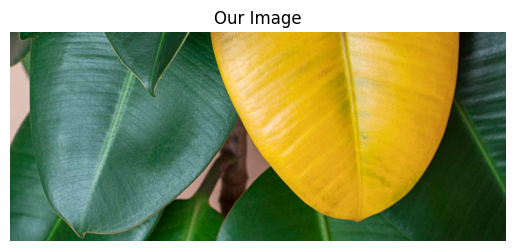

In [178]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [179]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

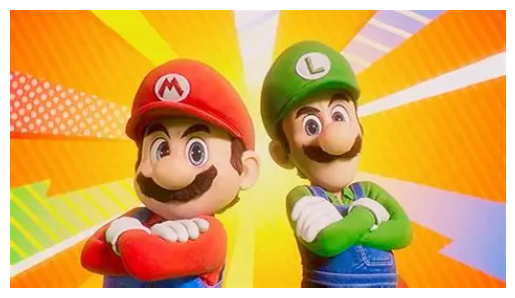

In [180]:
# @title
#Loading Image
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import io
import cv2

base64_img = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAEKAdoDAREAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABAMFBgcBAggACf/EAFAQAAEDAwMCAwUEBwIMAwYHAAECAwQABREGEiExQQcTUSIyYXGBCBRCkRUjM1JiobFywRYkNENTc4KSstHh8Bc18SU2Y4Ois0RFZXR1wtL/xAAdAQABBQEBAQEAAAAAAAAAAAADAQIEBQYHAAgJ/8QAPREAAgEDBAEEAAQEBQMDAwUAAAECAwQRBRIhMQYTFCJBBxUyUSMkYZEWM0JxoTVSsRc0gVPw8SViwdHh/9oADAMBAAIRAxEAPwBxg5ZeSpQ6V8byaZ9w3L3IcZDIdX5w/EKBkgR4YVCUfJUzjmmSfA2vhvJ5CCy7lQ6d6FL9gAe6C40FJ6GhSYN8cCtvc8seUodabIj1uQoApXkihy6GtrAUFeazsxUfojtYYOuOrcD6UVNBYSSHvTOo5um5qZcVCVAcOJIyVJ+FQbmiqycWUOt2PvY4LjtN9hXuIibDcBCh7SCfaQfiKzs7P22WcwvtOdnJ8B+/4VWy+TK2UkuzxXgZFefIPsx5j/8ApMfSmpZPLgwX3+66Kg8XhjNqC3uT2FSGnEh9Axk90+lTbeSRcWVzykyHhLjZ2qykjjBqepJmqpSUo5MubzREGyLMOKU2EE8ijJoYzdvcFcmgy7EyKuJKgOKQTJlhWAaTIjaM+Y4g5SeKaBFwsqaC+hrx48h1aiQrtXgbFSVowpCqJBNPIia+yRaQmPNXOO7u5KtuM12n8OrvFyoszetrMGWWqVI3HC6+loSzFM51NYkzxlPge+adFCpcmDMdT7zuKPGGRQGXeXkOeW2SVJ/F+Gnqi1yI+gPfPnP+ZuKgeq+1eq3Cp02mLGPyIVeXXDcpGXQcK28GvlHzi/UtTeDomjQxDkYpRWFcn61yi+Wa+40H2IJW6UkFVRmGghJKlpPKjSBE19mHshvfjNeENR7Sc+teHREl70qG04HelQZNGru5Sc5oyaFyhJBx2pBEJP8AmIdJQrGRRYoMgOc++Irn6yjwjl4HJ85N9K2adc3jNWdkVr3lEdc9P6V3PwPxWV1icl8Cv13Wo20NkSathLSdjScAdK+mrCHpxUf2OV3tT1ZbjAly2XUvtuYWj3T6VOcd7wQB+ha/ujaUtXFpLqfxFvgmqq80lT5Q3A8fpCyapYDTshspA5acXtWKr1Cdkvih8XyRy66BfAU9Z5odHUNKV2+Bqzs9axxWIt5ae55IfPh3OEsomw32NvG5aePzrRWWpxm8Jld7Bx4A97vYmrKVeFknJsfHT5SfCAZt8jwVKaW4VPJ6oHauN+X/AIlWuj7o2z/c6N454rK5ak0RW5TXpzvnOKyB0+FfLWu67+c3Dqfudn0+yjZU9gIXEutFoY5FUOME5LnI1KX5SgMU5EqBrLQVNhY+tFQVMQjqBaUyeCaIgkf3AXS405tKCcVIiFWMGs1pb0UKQPnRk/sNQeHhgGD6UmSWOUiGNxWOKDuaIbnuQXFSFNBs8kUOXJHlwKNYZdJxmhSYyUshK2g60HBTG/sYpYeAmIMoCCO2KBJ8gKpspnyF5IznkGlbIreVgOQkPMhYHNDlLgY3g3jK2r8tQx60B95BsJXH43Y4prlgZ6mDZuKl0Y6HsabKQF3AvabvOsE8SIyihQOCk+6oUGpSjcRwUt9YxvOy2dPamhX6OlaFBD340E9/hVFdWXovgw2q6NKm8xHnOOtVj4KTbhbTBIzSbc8g8HlEUoZGNwz1p8HgdGW1kc1Ha0JInR28ZOFgf1qXCq32aKxvuMMYwgLFTYyyi5jU3co823hwHHFFTyFyLONdFAV4Y3hmzJKhtUKRiOTRshBQoZobYm7It5YUOBTgbZllO3IPFeEybFvBG0UqGOQq0jdwal0lnkC5DpYiWblHOMAOA1vfBrxU9SUWU2ox9SDLNCwMqUcZr60tszgmjAV4bZMTckJHCeTUtIAgdan3D6g0bcojWbpiIUMuD6UnuEhUgkhDMdW0ABI4FZ7Wbt06MpomWsN0kVbdSfv7qx0Uomvk3yrLuHVb+zounRUKaAXvbAOKx1ae/ksVLkH5SelRsMPkScQSQcfzrwqZjblsoIzmvDk88CO0oOCOleHYZlSCoZHWlwe3MwnJGKVDovIg6jaeBRI9ZCxYhJUhDZWtWCOlHp95DpZPWKzt36TumpLUFnlx4e8D2Ca6r4j4fLWJK4kvgU+oairVNJlwMwdPS2EwobTSEspw35Sdikp+fevo7TqX5bBW8Uc8rTlNttjXcNLS2wXoqQ6j90e/9RWgtLvDwyDNDA/GcZUQ8y42R3WkgVZq4yCwBup9Dn5GpTm2hu0GKNqtw4PqOteVGM3yhFEdbbqa7W0hLbiHUDs4MkfI1Du9GVf5UuBYywSP/CmyXGKRdEBJxylwAg/KsdrOp/kUcSkW9jpzu3wipNQaktsq4KRYreqMy31WRgOZ9B2xj+dcc8g/E66acbaR0bTfH1aJNoic5KlOqfxwa49f6nPUJ5mzb2cVBYSEMBxtSB1qFDjklt8gQQuO8CT/ADqQgiwYnMIx5yBwetPQWm30xBOFoKD8qemGTG9aSy9n0oqDJm8xkPMhxA5FHQ+EsPADEXkqYV36U/Id8chf3NHpTRvrmEKVJSUEjJpo3iJ6OHGXQlQ6UOYyXIa60FnenvQZMC2EQ05SGTTewU3jkULamVbSMehoTBSmmg0Necz15FCkyK3hm8YlJ8s9DTGxsmLqY2q3p6etCkBbDGQHmCn8Qpv0Cm+TEdJS+kfnTckeaCpcdtxIBSFYr3EegTeBKO49EcC47im1DoUnBoNSPqcMBWoxrRcWWBpjV7c/bAuGG3wMJWTgL/61UXNmlyjGaho7otyiSkKyarGtvDM1Nem8SMZNIKlnk9k14XBkgEYUAR6GiQlyOhNp8EcvVs+7u/eWEHylcrx2NTac1g0dndcYY27cYIFSFJMtk01wKte0nB4xThGzOzYcjpSMbkUUnIGBmmYGt5N2xgY60o3dg2KCDnFeGuaFkteYBxzSp4BymbNN7XB+VTreoo9kaUuQ5seSpLqeoOa1Hj0HTu1XIlyt0GTyC89KjNuLV1SP6V9eeP3qq2al/Qwl7DbJhQZ74q2ddMr0LIISMBNDdTIopigpOR6S4A7wst2uSoHB2ECs/wCVV42+ltss9Njumit32woAnk4618n65X9WTZu7eW2OANQxx+VZVttYRMjLIm413CaDiZIgzUtBQpcP7H5yJKRsUABilPZaNXGwTvA606I71DRCOoPeiYHJ5NVtlJzjrTQkZA605GfSixx9j4tZAolrl3u4COj9ig/rFDsmuheFeLT1W6U5r4ALy8jbxwTyHAYgRUxGEgtp5Hx+NfVmmabCwpqMUYe/uPWbYoN7ZCm1FBHcVcOkpvOCqfKDY2pJ8MDJ8wfHrSO3UeUClEdWr3Z7s2GZTRQo9Q6MD6GmVKk4L4dgsYBJWj7XJHmwZBa3dOcig217WpNuv0MawRi5afuttWQ9HLjf4XGxlJq5oapGuvh0O9Pd0Msya1DZU4tQ3J4Ce+azXk/nFDRLdqLWTQ6ToUrp5kiIzrxKmvEvqKRnhAPsivl7yjzW51qTw+Doen6JGzwNrxUlwuAcHoKwym5L5GjiuDRwpebKTx8aRKKD03gb0ZZc5H0okeQqeTWazvT5o4oyaDQl9CbW1xrylelOTyEb5yAlJZdII6U5MkReTWYz5jW8dRRU/sfB84BoroRltfKVcUaLQTkClsKYkBSfXIp+U+A8XuRv98UOM0mAnpIxGCmHQpWcDtTZPKA1nkOfZLqA4jHTNC3EaTwgiEPMw0r86GxkpcZFglTDwJ7UxgpSyHbfOSFDnFCkwE+DeOry3ME8HihyAsXdaCFgp70yQzOQhkb2fLI5poKTPR1ll0Z6dDTGwMnkNW2MhxI60OQJi7I8xOD2pkpYAtmQyAeeKZkTJt9yUvC2gUkc5B5FJ32CqqM1iRJtN6rUztt90IKE+ymQo8/AKqtu7TdzEyt9o/rtyiiZIIcQFo5SoZBqoa28Gdq0fR4ZkgjrXgCW58G9KN/SzDiEPNKZWnIVxS5Y+FdxZHZtsdguEEZaXwhXxqdbSNBaXe5cgexST0qW2WaeeRZKMjpmvJ5GORlCPWvYBt5FQ3jn1poNtivkhQFeGOQoykIXkivDW2KlopOccU5T2gJPLF2klfFabTr1KmkuwFR5hgm9iWhcJIBztwDX1L4Teb9NSZjtSjhjntI5zWuyVCM7TjrSnjboOPnUmjHjI59DRqJ4/o1QA947a5/55UxprWS40uOXkgzyckV8palW+TTNbTYMpHcJqujCUlmJKVVRQPKlQ4TRXMlNMY6hawkj6Ua3sri4fCEldqK7Gk6p07nm6N/QZqzXj95L6Iz1VJ4N2r3ZZa9se4tk/HikegXFJZaHw1WEmGJIWMg+ye9VtShO2fyROpXcaiyJuJ2OYx0qNlslxluMuI3JBApkpJBeQdiO9c5AhRB/bX2SO9bjxfx+WsSxgDVrenFybLJscCy22GiGwwhRA9tahkqPevpHx3RI6NbqkkYi/vJ3E2mwiTY2XwXIh2k9u1a+F3L7K1SeORmkwZEdWFtn6d6mU7xMegF1I79am057xOwV1BJ5GfnUqMYg0k3yEszpMPapl9QHdCjlNVWozpU183hEylZOq+Ae7eIklqE5EgMp8/ss8gfSuIeUfiArPNtp75NLYaHypSK2dkPuyVLkq3OPKK1+mfhXF7/VrvUJZuJdm3taEaKxFAcpopcLgHFVfCLOMmaKCXUdKawqQEkKbcINKmPi8CcxgbfNSPnREGixJCgtgtqp+WFj+4GtBYXgDH1oq5Dxlk882l1vd+IU9BU8MFbc2naroetEjkIuQeXGCFhSRwqnptD4yMKaEqORjK0UTcxzqbAL7o76V7egnuEFyIxx5iefUU3Iilu4YRBWlafL6FIpkgVUUQksOhWOlDYGXQWUreQlaU5B60OQPP0LwleW5sX0VxQ2Mr89CjjWxZA6dRQ5fsR88BjafOZGeT60xvIKTwzLOWljPQ8GmME3kKcioWd470jYFhUYJU2Wu4GaHIDJmigthXHQUJgmw7yw+0HEcYHIpMDHIXiYwUmvLgHKWejL0I53JAz/AFpWt3DBOY7WG/yLfILUsrWys8gnO0+oqsurVdoob2wVbLRNWnGpDaXWXApKuQRVdtaM7VpO1eGbFPxpjWCK2n2aBRz0pr6GvGDVaA62W1gFJ7GpFvNLsLbzcXkY5kcsulKk4HY+tT4yUjRW1zlYNW0kdRnNLkO5ZNvLIOcUoPcmKhBVjimvnoG2hRCMYFJgE3yZCSPaHan5GuSQSE+Y2Fbf502TWAUpJm7Qwr5VJsamySbAykmsEs044C0WwOpya+n/AMOrv3NNQMxqscMfK697fBQx6MkH1pkoYQp6iKahTHkf1Q5sabaBPXJFcY/EPUNtP08l5pSIdcpESBHXOnPpYjMp3LcV0Hwr58rWjvZfE0jmorJU2qPFlyVuh6dQEsHrIXwtXTGE/h7/ADz+ep0fQ1BLeikvr/amkyDru0uc+p6Y6p1Z53rOVH5mtPGzjH6MzPUW88hTLmQOKsKcG+MEOV/JscIryUAKGB8aku1Uv1Ib+YVI8j3bNQz7etKkvKcQPwLOU1T3uiW1y+UW1lrko8MmFo1BEuv6raG3ce6TwflWN17QHYrNsjW2GvqXGRzTGdlPpisE7l54zVP474/PW6iTRoXqEWuyWWy0x7bHS000N55Wo9Sa+oPFPFoaNTTZQ3t/uykwwJx8K2so5ZRPnk3RKksD9W8oD0zXtmUJtDI98ZWoJlM4PTd1FCVNxfAjRvLtVvuKd7C0IUe6e9HjcSpvDBuWeiOXmC3Z0qdkyWwge7z7SvkKqNX8tt9Gg5VXyWlhYu5eSHXe7Gajy4qlISO571xHyj8Qnq0XCk+DZWOnbO0Me8pODyTXIq1WVSW5mmp01FYQHIQQ4HSKHlkhYE1KDzZBGKemFi8AQKm1BJFODRZpJRg+aBwachy7E0r3gtqHanIKnkF2lC8dKeg6aNZLXmtFQHtDmjRaHxlhgjBKVbT0NPUkGymhORFLbhwnhXIojmksiwqKXQr9zMtjaAdyORRrZOtlIX1VB8idttklckoWjaD1zVrZ6RcXTwkAuq8YrOSSjTjGBz/I1c/4Ruv2KZ6hH9yGsL8wlJrIGqz9nksuMO7zwM0xsRyTD1pDzQWkc4pkmR28PApCUU+wo8HpQm+QMkbvILa9w4zzTX0Dk8ocGQmSznuKjsjyeD0cltZ5yDxikBvOA1xoLAUB1pMgWLRhvQEHtSNjZPBkqLTuB2oUmClyGvMlbYcTzxzQ3+5HkxWFwNmOKTIJtiy2yhW5I4r2QblwFtqDiBSZyAkZDSFcKTQJvKAZaDrbNftjnmNrKmj7yCeKiTp5K+7slcrJK4VwjT2g4wsH1HcGorp9mcurN0+ELbKitogJSXBsUg96RZ+h6ymIymGnWil0AJxnd6VZW1OpN4wy1tFL9hg+8REOKQJ0Y7f/AIoFWa02s+cFz6c8dC7TjDo/VvIVj91WaT8uqrtAJU5/sEIRt528CgTpyhwwcm12bbMJznAoUuOSJOeOzdsJ+dCba7GbnJcG27ZwBSKWQbl+4q37fOKk0010M3PI/wCmX0NSVsrOC4n2fnXffwwvVGW37KTVPkiTbh0r6D91lGdxgzjigSucjsHs4NRp1ngVEP1lMjRguXNkojx2EeY44s4SkfOuA/iG3Wvdkei70+fpnMmvNfy9WTdrJLFtjk+QwrhS1f6RQ9OuKztjpPtfkx19f7eEyGh0k56H4VpaUXU/SZG8vXPhEl0lpi8anujFqtMbe45lTjijhtlsdVrPYCtJpumO8ayiAoylhluWXQvhnabumzXq5qu94GPNaaylLXpuQkewk843kYwa6DDTLRJLBdqyUUT3/ADQ5J26Zgpz+II9sfXNSHoNrVWWsCO0WCI6m8I2A07K09IId6pYcPH0NU9549bwWYoBOxWOCr21LaWU5W062SFoPBSRWB1Cgt22SKvc7KXZYnh9rxm0vuW+6MIUxLO0SCMqYJ7D0T/SrHQ4Wmnv+Clkv7HUJNcsttMWI6yh2OsLSsAhQOQR6it9SvpT6LKNZ1GDSIDiQC2OKnU7nPZKi8Aq0KQdqhg1JhPIsHkHUgZ4+tS51I0Yb2wypOfCGu5Xn9HDMd0hwdwelcr8p88tbJOnB/Mt7PRnPlkVuVwmXR0vyni4T0z2rgGua/d6xPNZ/E1dlYxtUN3fpWeSUei1i0ugeQkp9rHSjdhkxNTXmtlHQ9jXkGjIBG5tzA4I606PAVGspkJw8lPzooRPHAmyUugtkc4pU8D1IDWgtL+KTT0HjJfZu+wHkB1HpTnx2OUscCEYBTnl/SnRzLoe5OKPSbU8XNzKR7XNTKNrOq8JApXKSHKFYn7igMJaW44fdS2gqOfoK12n+LVb2KeCrratC1TbZM9M+D17dWHp62oaCM4Wfa/KugaL4DteZIyl75jtbUWWLZPDDS1vUhx+OZj6ed7nKc/2eldH0/xq2su0ZG/8vuqi2xfBKhpqxYH/ALLY/wBwVeewtv2RS/n13/3P+5xQynaoYr4yaZ9Tt5QY62VpGKBKWGR2xWMoITsPpSZyMkvs32EEEeuaZlA5NBa0B9jI6ikb4I74ZmA4WlhJ4CuKBLlgp4Ya8wUK3p908/Kmsj9hbWHGwk8GhsGzLaSy5nqO9NcsjGELaLoDiRmmtg2wiE4SktK7UwDMUQksOkgZpjRHm+Q1OHkJO3qKRgmxRlOzA6UgNsVV7JGE0IYxRsFQ9KbgTP0bNuuxnkvMqwR/OmyhuXBV3sd3Q7z9b6fs8JEy7z0RgrKUpPKlK9AnqaZYaBO+ecERabcyeEivdReNrsgFmwMmI2nILjvLi/TCeAjHPzz8K3On+H7VlmksPErj9VyQeTrO4TgBMuMl85yfMXkflWytdHhF4aRq7bx+EFwgdN6DitxeXn51ZrSaS+iRLSI9YDGL+8xhSJj6cfuuEf0NI9IpS4aG/kcJfRILR4gXNhwONzluADHlvHck/Xr/ADqpvPFqE03Bclbe+NxxwTmy6/hTVJbuEdUZw/jHLRPxrD3/AIxc0sygjG32iSjnBLGSh9AdZcS4hXRSDlJrI1aE6DarooJxdtwxRTZxwKguSXRFdRSYvGQe9WenVlLhjcocoH6mfHOOFKxXR/A5u21hc8Mqb97kSkk5PNfUcHmKaKBozXmLhIUB55qPVeINjonMX2gvENU+/L0hbVAQ4QDtwUFe86Dw19O/zrkGvWiq3TlLknRqqlF5KGmXJbqyrdwenNVuMLBnb26zJi1sdW44Frc/VBJUvnoBVhZRTkkVie58nUvg9YG7HoCLOdGZ2oB9+lK6YbJKUox8hXYtK05WkVx2aGyiorkhvidaTpnxPgajgrZiwtXMiDPKlbUB5B3bv9rj8qBdRlZzTRNbyXnZpqLpbI05sEKeQN+7j2+hz6dKuLatCpDNRjWzduXFfdW3HksvLYXscDbgVtV6HFEnWt3FpcgW2UJ4oxmLbriS1GT5SyhDjie2VDNcn1yEVdPHRmdUkoy5I+zKKVBRxg8EZqghP06/AGjecJItrw01W8sGyyXytO3dHyfd9U/8q3Wj3UZ/FmmsrhSLKamOAYcGR8q0Tpyayi+isxMumE4kuOKASAVKBOFAVX1tUjp0XKs0EtqcpSxggt5vbjjy2oStjGeD+I/WuL+WefV7pu2tnwa6xslw2Mkne62rcSpR55rldarKrl1Hlsu4R2cIDSCODxUb+hKi8iDwKFlIFOSwFTNXNq2yNvNebCRYJyk9OlJ0Gg/3EJjXIdSOvWn4DxZqgh1raeT0ojaj2FBFoUy4M9qdGQ5M2eiqfHmtjPrijwhKp+lCOoodm1vguvO/diCM9qutP0C6vpYwCqX9Gms5JJbvDS93CQkwreUNq6uPeykV0HTfw9ryw5ozN95RGDwmWDa/CeGy0hN5e87aOUNcAn+11/nXR9O8It7VKUlyZS88ulL4xJhbrJa7U2lmBCaaSkcKSn2vzraWWl0qXSM7eatOrzuDwAfe5Pxq4UY0+IlNOo5ctmyQAoECnd8gsNhYdOPdFJhHjifTdqel3CVbtRn9HPxkBxIPG9JGc/zr5tn4thcrB9TXl/u5tllf0EzMgGc5BZfK0NrKA52NZe90KUJYSDwqvbl9hMq2TYCt0hlaE9iRjNUt1ZSt49A1dRrP4sXbQHGQsiqd7h2cGzKtjvlq7imvP2Nk+MhDrAQrKR15oWQO5sMYV5zO0+8nivOXAFvDybtZQr50NgpvLCVt70BQpgNvItCXwWldRSEebYuGwg5AxTcA5S4DMJdQk45HWmS4I7FGBtUEHp601sG+hVaOhApjYB8sUQElO3vTRX0ZR7J+deS3PCBSknwQ3xE8QmNLhNnt6m3bs+hSgFctxkdnFfx9cJ+fNbHQtAzzIstPsHXabXH/AJ//AMKYm6jmSJbku4SnJkh3GXVnB4zxXQNP0z2j4Rr4adGKWFgNska+6plGPpy2y7ltwFLjtbkJVzkFWdv8+a1kNEk8cDr3UrSxX8eqSQ+EPiQVblWhn+x97Rv/AN3P99XH+GXH5ES38s0xcKf/AAMMqDdbNLMK8W2XBfQcBMhop83/AFavdV+dQLvT5UuMFzaa1a3nEWKeYQOh59arNjfBZvATDfKQkjuabL+EAqreh7h3ZSU+Uobkn1qPOCmuSprWSqJkz0prJ+z/AKpCyuMeCyTk/NNYbW9AjdZlFGL1LQtzfBa9nuUG7x0y4Tu9GPbSfeQr0IrmWoaVKze1owF9ZStJMcUpSjkCq2m/btMr1PgLhpy80sDOxW6um+OPFxTrIgXHyJQFBQCgetfTVlXcoJlRJciueM96nvlZBJkM8WddJ8PdGy9QIUDKUDGhJJ6vrHsn6YJ+lRb+ahb98hYnCdyusl4qccdK3XnFOurJ5WpR5Jrl19LfJtka6quKGhyYScHiqZxM5XlvYfbbk0Ms595JSo57HrUi0nskn/UHGXKOofAXWkTV2ibfpKRJQjUunmPu6orisLnRUnLbrI/HtBGfXiu4aTqELyC5+jUUpJR4ZIfE3Sqdc6En2yMn/wBqxdsu3nHPnIOdo9Coez9a9fr3nRIIdBa8btQ2Zi0r0zGszLSMPu3G4bEvLJJKtjWV4P7h+tVas7jrIxsklggjwojTLzrLV7c0TG0pYt8ZkNNhSRgFpOc5+o6U6d7Q0yL9bsBUqxguWU5qC+3DUV5mXyc4ovS3Csp7IHYD5VzfUb1Xdy5R6MjqjdeXAPEfkBWF5ITVTh+tkraWY8EmsF0egSW5jZIU2QoD5VZ2N87S4wabTajWEX5F1FDetcWcFblvNBZSD0JFWuueax0+2yuzo2nUvVwR27XGRLd3bylJ7A9a4Rrfld1rsmk8I1VKwhFZwNxBx1zisvmrF8vknwjs6E8g8Edaa3L7DRBnUkEECnJhlI0UgODkc0RvKCoFALbhBpVHIqkayGRjzUDrwadGLaYenLLwjDbIeBQRRIYb4DKTh2BphvsvlBGB6mrChptS8ksIa7uMe2P8PR1zu6QIUNTwI98D2fzrcab4NVukm0Ud7r8LV9kvsXhQ+w2ld1uDbSSOW2cFX8xXStH/AA6hBZmjO3nlbnxEmFt0jYbNtXFgNuud3XhuVW9sPG7Ww6RlbvXbiq8ZHdHQpAAT6DpWhjCMOEitlXlUWZMzk96LmP2RGlLozREmlwI4PGTZAOcYOaDJNdiRjKXCMOutxgVvrS2lPKlrUEpH1NRpX9OhxJolUrKvV/ShL/CTTHfUMDPf9cP+dRfzq2/7l/clfk91/wBrOQr3E1N4jvTNZuQIzaEoDbaM5U4lAxxwP+zXPr6+978kj6IsXa6I/ZvlseFztEf+GP3K3MRf0mptKWmlJy4X+cKz9ahvZeRxgrdl3+abpP8Ah/8AGDTSsWdra6t2O73R0sQmw4QOVOEHsP8AvtVfaabG/btmE1OpQ06DqWq5Yncmoel77OsjjqJLMco8kpVgjIyc/wAvyrO3/iStG0gtjK4vbb3DCJ+mr3DiM3ybAUxGkgFHOSkHpu9Kzd/4ndQW7A2Gp2s5O1i8tCI/Ws4PvJrL1LCUOES5NIzF3IewOh4NQa1KVLiSGt7lwGqa74xUdyX2AlIKYGUAHqKbnIxyTNwkJVnGO9MbA5CwnzWwocZpmQUhWMNo2kdaXPIJhBTswoUyeMA2KIHmDk0MA3gwlO09cV58LIyT4GTxH1hD0FpaTqGQlLjyNrUVjOPNeXwlI/PcfrV3oGmS1C4X7BLS2dzNJHLKruuQt+4TJDr8qS4p6Q4HMFaz9K7NY2GEkdJ06mlFLBLvCfQDHihqiYi5pfTp3T21ycts4Mt5XtNxh8CAlSvn2rcaJp6SzJGd8s116QtkO2TPxR+0Gnw815ZtC6MtjDdk04+k6gjMFIK0rQQIrQT0LSBuUcfQ1od1ODMdZaHU1S1d1cPl9DLrP7Tk2Z4oWf8AwBdL+l7WrzFqik5vOUAFJB5DaPdTkH2gfoRXygy0sfEcWbb4qfsdNBjT+udPJ+/sM3K2XFlDgS6kFSMjPH7ixkfKj4jfLDRzh395pd9jrYzmbW9km6G1lN0tLeLzKEJkW+QRjzoqvdKv4x0PzFZDU9O9k3g+hPGdR/PbNXH39/7jIm4uhwYPGaoJfLsv/ascmrkHcBOR8c0CUeQc7Zjpb7qtlxO459M1Hko5wyBXtFJFgaS1G/anxOhOZT/nWyeFCs7rGiQuluSMFrmjqomXRZrlEvkBu4Q1gpX7Kk90q9K57faE6f0cuv7R2sh1jDyznvVroa9GSTKib3okTZHlpIx0r6V0i5i7Jf7FZJCnmbuCODU13SjS5BqPJyJ9rPWK5mrI2mUO5YskYFaAeFSHAFb/APZRWS1XUHJbYskem49nPbl2juJ/aZx3rMz+ayynvwVUxt04QqoU6bRnq08BUV3YQdtAztK6pXaQ/W66urca+6vOx5TR3MSmllDjB9UqHI7flU7T9SlYvhj7O8cXyy27V9ovxD02yiDeblab4GhtaTIiKVKcHoryzuPz+NaqPlnBfLV8cBavtCeIM+Mplv8ARdkZPurabU8+odwcnA/Knf4qbEesrBXF/wDFO0QZL8+639y4vuYO513es/Lj41VXl7K/ZldQ1h54Isr7RNgSra1b3FfEt81DjaSjzgrFqk58Blt8fNLSnA3LQ8x6EivK2aluYeFy5fRYunNV2W+Npct8xtwKHQKGR9KiSpZr5NBYXLWC3tHyQ5bSzkkoPf0rBeawko9nW/GLhVOx6eBPaueKWFwbdSbEAOcUNybCR5EH0kObQOBTuwyeTyk70jIxivJjlLAmGyk4oiljsKuEIPxVFwrSkipUISkvigUpL7CbfbX55Uyy044ccJQnJrVaN45c6hxtYOeoULZdkhtHhle5CkvSHGYzR5G8+1+VdF0j8NXJp1CivfJox/STGD4f2WI4h58KkOIHIUcpNdM03we0s8OSMve+SzfCJIzGYjNhqM0hpCeiUDAra0rS0s44iijndSu+ZM1Wgdc80WMv+0EZ57ClS+XIKTUujOMdeBQrmrCjzJ8CxpynwhuuGoLNbApyddYjKE9d7mFVV3XkGnUI/JrgsbXRLqo84ZFbh4vabYCk29uRMcScYSnCT8j/ANKyOo/iDaU040GaWz8UuJv5dEIu/jVqRT5RAix4bY6FWVufmawt3+JNdyxE19l4XQxmfZCL7qi63h7z5tyffVnOxS/ZHyHaslrHlla+WUzTWfj9rb/QzGY7n3zWS/M7n/vf9y0/Lbf9gHTOrdQKtSND29tDjlwc8ltavwBXvHH09a75aU/9ITUbC1b/ADPPRJFaZY8NdT2iTqBSJ0RxKggMjOxz2cKI+GTTrq0Vi0/3KJ3z1u3lC1WGj2oLpIvV0cvul7e6wxHSltx5gDClf345/Oo93uWJWo+yirJe1u+X/UPe0vY5WjHLxKuIdlvgvFwu9VHoken/AEprfHuJdkb3t17n2sV8Q1OoLzrmDH0z5LTam9qnHgcBYT8Ox+tDlde+W3BFdj+Tz90+chOlE2nTF5uUPU7SVykNJDTqUbwUjOQPlx+dQ7PT7S1b9x2Mv/c6hFV7fr+w3y46JcszY8d2PEfeCULWnAAKsZrL6p4/G8uMwWIkiN/6Fvtk8yHi96baskZl03ASA8sIABBOTVNqviatYbosiWl/K6m4tYGlmPILa3mo7q0BWAQnrWPqaVcYyk8FhKai8ZCC1ubSvGKrp204PEhcm0dZCw2RwaFmMeBuU0F7QjGBStN8kecuRUDe2U96FJMYzLaSOM0m3dwByLeXjnFej85egj2N3Byr9o/Xib9rAWWAsGDpwBGN2UrlKHtqP9kez9K7D4zpysrVSa5l/wCP/wA/+DS6LZv9UimU31yNL2PyNqE9VYzit5Tp4xg31jFK3aOgPAzXtt0H9l6+63Lh+/HU0xRZ675W1KWUH+BPXp/Wt3YrEMI47rqd9ryoS6Iz9nbwyg+LcPWupNRyA29IUIdvmlX61iarctUhB9ASOfiKa7TMmO1zyD8guI21t0Sq1fZnuiPBa7MXqM0jX7s9V0acaOQFMjAYCu6XGyFEd9w4p/ssRIlPy6V7dqvnC6wST7KvjcL9G/8ADzUi3RdwtxcNLcdRQlKE5cS6R7m360ax/hvDAeW2Ckldx+z32oLnEia10nBfd/x1q0yXHMdm1LR5f9FVWeQyWOTcfhepK0qftwVfGmbnhlzdWKfJ1V4wPcWU22BnGaZtyyPUpuQSZwwMGolxbNvKI8rdyJDp+8OtrThylUW44KO/sXJNFoaM1W9ZpyFoUPuz2A62fdA7rA/eqov7FTRzTXNG3ZZdcd+PKZTJiueY04kFKs9azLsvSllHL76lK0eGh2gvKLACzkjiuk6HqTVHZIrMbuQgPBIKj0HNXtzd/wAHB6jBOR8y/GnWr2otfagvAkKU1KnOuIPQ7QdgHy9k1Qx/i9k2vTUUVwm7v8kOcU50UZ28iGQb0QsBw5PzqHUp5M7dQwh9auzikpBGArgH1qBKhllNNZHZi6GMzsLnkn3gf84U9j/D/Om+2ASSgATtaIsUItMPoT5i1OLUtO5S1HGSVdf60SFlKUlhDVBzIJfPEK7XJKmY8lxCVnCjnhSfTHar6naxXaCRsJzI0ue/u3K2qJ/eGakRt1gs4aBlcg6rpOSctNNEd+KNC0jIPT8dWehEagfZcDi4zStvXii+y4J0fHkl0SbSGs5MaUmZbZTkZxJ90K4J+VV9xa+lyyytdBSR1z4HeLT91kMwLpgPOKS0eeufxVz3yy09xQbNXotH2k8HQoTngiuPpNtxN3GWVkTdRg7sYFPlBx7CxZ4M+b0HIFFox3cDlP6YihCQrYQc+g61YWunzqywkzzrRp8tjvB0ndLltXGjlKD+JfArdad4BdX2JNcMqrvW4U+ESqBoJhLCW7jIK0jqhHGfr1/nXWNC/Da3tYp11yZy88jbWIkigWyDbkhuHGbbAGMhPP59a6BZ6TaWPEYooK1/cTWZBahuAyelW9Pav0kB1XN8s98OKkSexZkPjSjUN1kJHtED51Dnf2kXiow8bGcliIyztU6egBfnXRpxSOqGjuIqk1DyzTbFY3Is7TQLqo+URC6+L8VpRYtUIn0eeJSB9Ov8qwd9+JlvFvYaWz8QbeZkP1L4hakubXlKuCo7J5KWDsz9etYHVvxDubr9D4NTZeL20O1yRJ67mSypEhZWeylHKvqaxt5r11eLlmio6dCjxFDSZHlKygkehHFVEas+2yxp0lFYwIyVl5BcGcj409PPLJMVjoBbfycEYzStLAZRzyLYFAH4HjxBuWklC3r0g2lExt0ub43JSAB1Pb/1r6Rh8VmJnNEjd8xvX8X9MX0/AuHicp+7Xq7uFMImNHCE4AV+IkZ56D+dBlL3X6mBu7q30WSVpHsU0xrSRp3TbulY1sVLlF5TLDrYA3KV6p7dPU0qu/ZxcUssZe2Mry6V7XeFgxY9NGx323xNSNFMdaVLOThJVjIGe54NRrOWx5uuELeX8Z2z9ny0ON7u9vtGqw/pRTJZQwA6tHKSfQeuOfzod9exi/5VEeyUry1cbzsNlaUmTLK9q6ZOZL6wXVt9QR2Tuzx37d6i+z90vdSZC/MHCXsoIJVeHdRW+JZYFsc88JSohIGwAc5Fe9d3P8CguUJ7WNrJ1rh8MV0/BiSrk7C1E5sUxk7FnGMUGds87Lpgrp4j61ojP6WdtLs6LbHkrYW4UoKkZ5PX+lVnuvaP21usp/0GNKWJ3XaCXdPu2sNSLg2l+OCQ4GzkgetQL7QbV/zFwLPUFc8UAaVbYzzpesjMlxrvuHCazF549Ru/lag7e9cXtqdmqIUlWdyMY6/Cste6bcWb2pE1z+2eSnCtuRx6VUSpXFP/ADEIqkXwhXy+AcUm9R7EbwNOsdRt6Q0pd9ROYAhw3FN+pdIwgY/tGrrx+x97eJixjuaR8+LxOekSVvvLLjrq1OOKPUqUea79bWWKKwdDso4ghhmuKOCTnFWyp7cGmso5jtJV4Sa+09p9+7eH2vZCmtJasQn70+Gy59xljAEnaOqefa54wDV7Y3eOGYbyrT2pb4Lk698F9Fq8NdAQNLx7lBvUcuvSkz4D25mQHFbkrHU+7gK4PQVbqafOTkmuUby9ksxf9iwWZUlGRGZcJ77Rmi7k12Qo6dUhh4ZXTzfhN4C6v1D4o3u5MRblq1plaLO04lx4OpwVFpAOUeYcbhz0HPFAcoxy0bDTtNvdcxa4/uctah8WLjrLW911Ve0lUi5vbkJUrP3dkD2Gxx0GT+dZfUqyu32fQ3jvjsdMs1bfY6WfV9sdkpbU8Ekep61SbMcFnKyafBLm7iw62FtuA0xrBGlR2CsaYtbm09O1MfPYOUMIkNsk+WtKwaC445Km5p7ib2e7JShJUM4I/Khzju4MpqFi5ZLk8L9SIW4uyvODY77cbceiupR/xGq26tFjKOTeTadjlItFklvin2K9JnPJrYsMxdZf3O0T5eM/d4rruPXakmrK4usrah9pHdI+Ter5OXnXP3lKX+ZJ/vqTZ/JEy6WCKR55UcZqwdDcZq8+PI4R3C5z1+HrQpWmSqlD3CDLXc3ZVw+5qfShKRl51Rw2w3//AKoDs8FZUtNmTF01C3DdLcclau5J5NIrTHZWqwldsjr7s66vqczkeg6CpC2wRqtP0TC5C4Wn5T+DsOR2ApHNl7T0uKfQ8xtCXeSyHm7a84g9FbetEjNllDT8kT1hpy7xriiwwoMgydu9xDbe5fPROP3uvFWlnJNchfy5obGfCnxGZUHGdP3Mnugt7l/7v/WpPu4Se3AWNm4okVl0XdrlBkXOHapSJdrHlymQyfZ29cmq27nj4/TFlSwjp77K2lJd61U1qJbK0Wy2NfeVPKRlLh7BPx/51z/y7bbQ2v7H2XEuTrXywMccH41yCVnKrLdQRpVWUY9hCLTKmtFEWO44s9ABxWh03xHUNVwkuCNU1CMO2PNu0RNTsemOpbz1SOTXT9C/DPbj3KI9TWaaWF2SODYLXBX5iYjbix0UsZNdR07xTTrDH8NZM5eajXl+l8Ds3geykAfAVp4UaUeILBVOs59s2GSeOaWVSNBYbI+yUnwgaVPhw0ebKlsNIHda8VXVtTsrRbq9REuGn3FzwR+b4h2Jh0sR98lfqgeyfrWTv/xC0i0yoPLL608ZlKOZEauvihd0Ex4UNhlKfdWsZV9a57q/4n1pPFLovbXxhLlkTvWpbheGCmXPfWonkJXhP5Vhr7zG7vVjLNFZ6JTpvlEeTNcZcwOT3Pes1U1CrP8AU2XkKEILCQPLJW55nrUPc5PJKisdCDjpcbU24cjHFKg8ENigULHOacS48I88jLZWOooiCIFCiRtJ60eKwGggZxBbXkDj1pAsUbefShNo+aJNu8P9S3OFqWL5qxGbLTu3O0kkkY+OB37V9HxaspYZl9QVzriUrR4Q0uSLm3OnXy2xZsG3XKZuQpAO0oOR07dKi3eZPMeMknZFU1bSw6iX/JLdV6dsWiYtjuWn5hVMDoUkKV5ingEk5I4z3/OvNqyWXyUlje3OoOVrcrjoKabv3iap2UGWG4tv/Vjn33Ox+mP51H2/nH9DznbaJLb22b2C7WW16cmWufHBmkupOU7krVxgA0P+Ws07ZcsjXiurqSuVxERswuU0R9NvyHY8JSisNOHaCR6D6/0qKlcP4vhEiTtow93BZkh9Q6NBXxL0RHnIW1gpV2B64pia0qXrlZU3axHYzF2h3e7l7U7kVtppznYOFBHqaHdTleL3D6EtZq1/lcjhc12Q6dZRb290woS3g8q3DqSaJK5tXHFuuSKlV9R+4/SK2qJO1E+YlwnEfd8FA2ZJB7dfhVPaWnvm43LHXWLJb6a4YrEniyKkwAzv/WEDBolT0LP+DQBRtfXXrmj1vmxFxZcxry2X3ApYPdJ7VF/L0369x0I7z1s0Y/QVeI1tdSgwQ0DnnZ6VWanpltdr+EhtvVnTeJCULT6pkRyQHgjy1EYI61l5+J+sm8iXV64vESi/tWT/ANEeHjdqMjC7nKSnCeikNgrXn6AVb+Iae6VXP7Gm0GPvXyjiy5QZzziZDkhuFDTnfJeOEqV3SgdVEfD1rtNqsrB0OzguEzSNK05bHR/i5m7Tlxc1RaZKv3g2Cc/U9qfOPJoXqNpYx+THGN4lMQWki3eQCfddhxW2sfkNw/3jTMOL/YztTXrKb+XI5wvGq6wnPNY811XotYT/ADAr29/uAlq+mPtIldt+0PMYKg5cZEfO3fseUcdcdacqso/YN3ek3X0hObevCzVQcuU7T6DMeIXJeYdcaeWe6shRC/lnj60+V80sFrp06FJ5tmhlleH+mLi2HdNaxBcUMoYnIz9C6kbd3wx3qqc8vg1FLUrqXH0RS8aWv+n3d06GtCfwvI9ptXyVXkmy4tb3esSDtO6wetThROC3WzgcHkfnTJIO4xm8os6z6itdxbCoMlDise0AeR8xQWuSsuINZwPse6YUEhPPzprRBlT4yyQ2i7lC0pVkA9KBKJVXVJSLE07dlsuNSGHCFtKDjZHZY6f9/Go002YHXtO3wfB0dpa9Nahsse5tkblJCHQPwuD3h+dR4x2nE9Ts/Tm0b6rWUaUvah2t0j/7Zp+M9kK0jtPk9rFRATk9WxVlYvkLcvJCYknDwB6E1fRXBR3UMhVzvCogEKEQqQsgKI/AnuaLsyircdiNvv3+KfcIhCgofrP3nVdyTUV9jI2UruQQ3aixD/Sd5lN22AngPvc+arsG09V/Snwpuo8I0FLS9q6JNpC/+HKnyzdYl7lx2llKlQ44S2n4gKUDz/dR1Y57LShZKCOsPCRj7P2rEJsun7tCXdSn9VEntFiQs88Dfwvp2NKrJfZNhTUei+tPaRsMW2uMPWhhLkcEBJSOVelFVin0eVdQlhlT2Dwlj2S9zb5OsP6Z17q6U9IW35qUMRI+4+wXSPYbQnblY9tfPpxYWVhgLc3KUU0SZ3QutdGNm7ai0ppq9W5tZXJc04HUTIbY95baHP2yE55CfbPGEVLlYJcojq5yuSa2GyaWL7+pbfbbdLVd2EpcmpZSROZ52+Z2X1V1FVU9P91nIu9SIH4AeHpsuqdeaShOIjRLRcvLRu/C28C4ggfKsvd+JLXJfJgbv4co6CtulrVFSkyEmQ4kY3KPH5Vbab+H9tZ43ogy1CSjjI6IQyzhDDSUY49kYrc2mmWthHFJIhTu5VOhRasD2yB8SaLKvCHbSGKE6n6QKVebXCG6RMbOeiUHKvyqjvfKtNsP86pkkLTrqpxgj9y1+xGUUQYKluDop3IA/I1gtX/E22g/5dlzZ+OtrMhhu2sbpNj4bfU0D7yW/ZP59f51z3WPxCu71YoPBpLTRLeL+SIyuc8tJD7y3B/GrdWNq67eVuK9RlzCwoU/0oa33CFApGPlVdOq5vOSZCCh0JOLLg5JzQn8uyXB4Ay4GlYNIm10HiDSffLoHFJ2PSEkr88behosQ8VgCcUpp0pI70RB4mjzRKN45pQqEUO5GwjqKLELFATyFtODuD0oqkGiaugvMlKeop0QkWIiI5gc0/A7cSi5eHEqdpmVqmdfVO3Hyi55iDlJQ37OM/T0719C+yys5yZSz15wmrWhTwnx/wDLFHtWf4Wacj6Ws1qccnhKFKbScJwOqhx8ahyunNbcCqyen3bu7p8P/wC+wjRtthu3yTD1SwlD0UJ8oPpwRuGVY/lRrGzTb90xmpXrlHdZf8GsbUMvS9xuUPTrqfIcdIQtac7M5GQPXn+VQleeyuGo9MB7JXtBTue0OM2xTNKPW2+PvffkOPAPIWnIPx+HU092atH7p8gPee+i7SPA5arvqNRzGXIMOQUR053bPe3f+lRby894/iRrCxdlxUYZpuw2W82ORd7vJzKUsqW6tXtN/wBk/H+4U5afbXkN1w+gF9WlZXe22XDB7LdLncoTVgjkDzd6d3fHw9Kiqs7v+VgLUtlbL3Uhwg2//Bu9JZufluJKDgj+tQaVKOlXOK3QGcnfW7lESlSlfeX5dt85CEkYWMp/nTrvdOr61v0DnUjKh6UuxykWdqPbm7qzJ3PqLbqjv35Uc5+VBf8A7fP2Q3dyX8N9BDs6VqEfdQy2nb7RCR1V3NLG9d5b+2DezhZfNsL0+I8UPw57bfmpVlO4dB6UlvGFqnCXZDuHKT3RfAn5jjbimGyUNOrJHNRJ708/TAqSkuTmz7br0GyvaTg/eEuEtSn1NBX7wQElaeTt4V0zV3p9grPDRrvErtrc2jiDU1+8lYkNbnFqO1A91KfkK19jyaaWue0bRFDdEOErmEOZ/eOQKsfRb6KO+1Gd285MjUESMnDTCQn0Fedo5cspp1Niy2YTqqOD+xP50jsyDK9gvs2TqOKTnyVc0yVomCjqCi+GFN6oaaUC2hacDHBxQZWSZYUPIZ2r+LHu36taSULD20+u4pV9CKiytHE1dj5tKjjcT7TPiVJgtFhUj70w5hKmHEJWFEZ3ApVkKTz17/CmODijeWPkFnfr5PH/AMkucs2htTSFLhLYtc3opK2z91Oeox77Cuny9DUOTwy6jqFxaf8At3lETv2h7hY5CX2WylnqjYoONOj/AOG6OFfXb1/Ju3PZe2F/G95YfpjVZbkiFcslaOCG2tpR/a5pjjg9fQ54LXtUlhaEKQ+24AeqDnHz9KBKJSzpOXJNLFOLa0jd15FR5x5M/qNJSi0y8/CDUDTUx6yuKO2YgvNZVgB4dRj+IYP+z8aC6ZxTyewlFuSXBZ14hruNnnWwcCbGdjqz6KQaRweDER+DPlHr6CuG67FkN7H4y3I7qfRSFEH+lTLLiQtR7irX3lMErR1TkitHTeeCtrrHJiKypSPvz2S/I/kKNNbUQFS9eWEWF4X6aZu94aYkslSVHJz/AE+VV85I1Om6fsWWiRseEGrvGrxMuFu06Gf0JYHBBS88kpiR+owMZ3OKIT6VYWcoqOMFtKko8IsC1fZAv9+eUnQimdULjPOMSZMgmDBjuIVgpQ5+NXGfYSsp/ewc1bqg5EGtJU0O0r7N968PFtTvFHTrTcFp1IjzrdNU7GCxna246k72Vc8Lx17092jcQlhONSWMnW/h9eGrzE3/AHhx0qbbSPNXucSUpxtUfX/nUe1eG0yVfWUY8og3jh4mXLw3ZktWOUi3Xa9Mk/fCyHPucRpeXC0lXHmKVhKQe9WcJJdEBUt2Mkb+zp9pu46nvyNG6vusq4tyl7Q/ObQl+M4rO05QMLbJ9nj3cY+cuDyQ7uGx8F7Is7Wnr5NtLQDMKYfvsVsJ9ll1ZJdb+Cc4Vnr7dVt6uOD1NtYCNFuQ7Xr7V7MottOz2oVzQ4tftONhtTZB+KSjP+1UK11K105NyC3cdySRK5WqrLEb3h1bqj0S2nNU2ofiFZ020mQfy+UhjnaykKwqCylB7FYyRXPtY/FCrDKtuifa6MsZYzu3mfKaWJUtwqVzwrAFYa984vL5YbZd2mnRg+UMq1qSvJJJB7ms3PUqlR5ky7VKMfoSeXu5HpUC4udzDxWAMqKlYzjNMjL7JFMFkKU0vbinP5B48iDo3jPpSqWFgIgfO04NPDQApYyvcOlKuWSommdyFIJ5NPSHxQIkFh4jsKeg8UjWYkODzEjpT0OQMhzcnYRilDUwWQCheE8AU8kx6NHB5rQIxx1osQnQNGc2u7VdxRIj8ZQXlHp/OlG8iNjbvT1wh6Lvlwkw4UhZW6lQO0tjsOeM/wB1d9xKz+DfZWagqcU7yzSbX7EkkBnwz1zHl2vZLQ5F2KQpQztPbPP9KkLbZPd2VbctetGq/DEr1GveqxI1iIYbjqbAbbUv2ghOcdviag36ldP16BGs3GyftX2Pt1l6Rd0PGhxIrb1wO1KVtN/rdxHKs9vnUiW12v8AUg+1vI3blJ/Ezpu2SNXyW4dwuj4TBSFJQeCSfX8qrbXN1mNRjruorHFxBcsXgXJnTE+52pxKpIQ5uS4ke0rCQMGjqcLROguR04PUIqv0Jv22dapUZ25x1txZDgLpQc8K/Cf+dVboXEHl9AXdKdBxjyx9vztqgToq7ElCVNKKiGjwAMdu2aS9qbfla9ohWtOU4tXL7MsQJ+o4z15kvhLqVlCQR0AoWx3VD17n6FlONrL0I9MMj3Vo2RdoVDBljKQEpwFfHNEVzCVvtt+yL7dq43N8HrVFSzPaZurJQhzOAT1x/wCoqHYfytzi5+xb1q5WYfQVLfbtFzWbed524V2+VevXTtLnNv0Rt7uIreLqgTW4ibo+vzFOHeeOmajXFKcv5hgKlVLMEI3i+2uHZXrhMaWhqC0uU8r91CBk0ajXV1H00h9nbOpP/c+bHivrS5as1Lc9T3p5apVxcUtO5WfLYB9hsDsEozWjsYuWE+TZQjGwjiKKG1FdDLeU0keyOBz0raWNnjkrZS53MZStDg2ocytPLmfdSn1Jq09HaVt3eqmuAV6425DntqcXj9w4T9Keqb/YppXsrhEjtNqjT4yJMUb0qH5VWXcpUyDNNj7G015gASzzVPK8kR1Tk2HJ0bJUMpiikV3IKqb+xOfptUCGX57LUdlJ5Wo0aFw5PCRIVRLsjLmoNPQ3SI1zcTj8Yb4P86tvYSkuQsK0ovMWSfT+rZuAYM5M1gABYCtpKP3fhVXeaft5Ntp/ltzZpJvJZenPE55lSYr8jzojh2vRJKNyD8x3+dVrht4NjYeSxuWm3glL9l0/qpz75pGS0xLHKYpVscSfRhw4H+xz8xQpJPhG70/XFNYbyI6flzbY+lqQ0qM8tzy/1iSkOr/cUD7rn8NR5RaLxqFWO6JathmrWU7zt4BA9KC4mV1JJZLM03cHYL0W5tuEKhvJeOP3QeaWMFI555BQjKg+DqIL81DbqcKQ62HEkHqD3p06KwcVuP4dRo+ev2odCjTXibqCGloeVOd/SLBA6pdGVf8A176j23xbG54OX75CTbkuyHmcpByj0B+NaCylvYGVNSANEodvl0kvyl8Ms+yge6MnFTrxbIcEqws1uyXJ4cuJtd8ik9CvbVEpts1dKCisI64095DOlVWWysMWxl1ktpEdvAQpeApwD97Hep9BtNDJxXJEftM+MV+8P24fhToOfKtlssEBhEl2CrynJMhxIUlsvDAQlONyscr6HGK29GKaWDOXnbFfs9eO2ob9+j/DDxrjy5lg1pDU1bZV0bJUAdwCkOEfr2lcJKuNjh5+JpLbEiU6rtJKSZPfC373ozUmoNK3KWVGxzFMLdWMb0jlC/qjbms7U/hS4NNTnK6gpMkviVpOy+LUIWmSZEVpbS2/vKE4cwVJPs+nu/XNFhXPOCjwMVh+zlpWCmypj3a4q/wdQ83CLiWSSl1e9QcUEBbmD03k9T1yaKrorLqCky5JqXJrVrDzmX2OPNA5KgkgqI/iGOPhTnPeCjHaiMa2kxtOz7TrOYn/ABSJ5ltnOjq2zIWNqz/Cle3PzrC+XWbdNuBNtfkEut+UcY61846lUqKs4tlpGERLGcjNVarc4ZMp8CDhKOBT92SVFYBZZJb34+FKEQOlzGM85pgRIFkKKXuBwaXIeJov9ZyRyKIuQ8QfPlkZFEjHIRA8xvB8xP5U/sLAESA4narvSxJUQYpLbm3sOaJEehOWhTvto/KnoLF4EmlpKfKV1Hr3p6DIGfT5SxnoaULHkTdSh1vck5IosQsWBctqxRFyGQi42fMLg70+XQdLPBnzfjTReALxF8YbZrCVbJbNifhohlZCiU+a5lIHJHT+ddsv9dV6RdC8RurBPdUzkI03rTQzlmlf4TRpsie8pYSQnJbT+Eg/U0lpqFsovd2Vl/pt9G7Sp8L/AGFrP4jIRa0aeXcC1CcUUF91slSWyTwcUP8AOIRzCPRKutClD+ZxmQ7af1LpewahbLUwTY6WikLSjAB9cUL83hF8sg3WnXd1b5xtFrvq9D17XcrXJEYFISC2cZx3NCqatRqP48HqWiz9ttnyyUzk6aY0+zdWbmldwc2uqWV5JV8qlK7tsKblyZ+jQulXlS24iFNXeVq9hqE5JjJEZIWSlXvEdM0s9RjcLbkDVsXZScsdhembvZ7M/LYu6G3nkLOF7cpKewFAt761oNqRHurW4uEnHgTiPym5LUVtL8VEt04B4QhB6j4ZpiqKT9s3wwkoJR3NZaHe5Q06dlwpkNQ3qWpJPzxSXtnb6RivbMrVm8bWBV5i46hS5OCAlLAITg9agq3r3/8AMy6PT22fwf2FRpNsZtKY7iNz3QkjKvzpJujNbX2RI537l0etwclrEJ2Q6lkchOeR8KFTm5r0G+B1aMXHKId45RZcfw41RAtTbkh523OJShHvKScZFSbKKt5+miXo7j66cvo+ZetnnlpdDHXbz8q2GmxW5ORoLyW58FQyn340BW1fvnGflW6oy5SRW3clGAVI07c1wbZZ7ZCddnTmy86EDOTx73w9aKruCzLPCMg4ybJHaPAe+zWkuXS7RreojJQW1OY/KolTW6ceujzjtJLbdAXXwq1DarndGkTLBdHkRnJUbIZyc+yQoZbUOeTVfO8jfxeO0MS5Op2tCWGHAC2YjQx19jrVY4pMk04IYtUmwaM0hN1dcbc2WWHAwwykgLkunO1A46HHPXtSwpqUsILKCSOUr5G1j4n3UXRcF6QFcIaQPLjNp7BPb86uIXVOyj8nj/kgVVtYXbvAS8yJBTPvMCGtQH6sJU5j6ppr8ghLhCLIVG8HtVaWvUafCiJlxg5sdLKjhQPqkjI6HtQqmqxqwal2OSlkmMnSpaWXPIKSrt6VQVq6ZNo1KlPmLBozVytTpXFdVhPQelR1WUjQWPkdzaPDJvpnWFt1ilmDqCQ23IdHlM3B1PsPY9xp/GMAc7V8KT361J9OWdsuzp2geSJr5Mn9q/SVokMwbg8QtR2xluHC1pR7yHCONw52rA9tH8o9Wm4IvHUV7mRbun5WUJ6YUjBHqMdKbQWXyZDXKfwcTp/QUlybpC1Ovr3LRGS0T67cipjpblg4Xqy9O4aKk+1/4dDUulI+tYMfMuwn9ft5K46yMn/ZXhXzqM7NrlEGNRHzr8RrY4xCdbUrkE9qm2L2ywyRseMkE0Fc02u/JjvHDUxPkk+is8Va3UPUp5X0T7N7WXJY97N4jBPUOjHxqjjHYzQUpbkdhaIiTJdtjrLeAdv9an0VloSSyytftC6Hm327XiztPhmVqMsXO0LckBpMqVHRsehqJ4KlI9tAJFa+0qJopL21f6kV54Dac1lH1NHnalMmJCtcmJGgpnIdU4ylLyVPeUhQyhKfLAP+zU6pKO3sro2Tu2kdEwrw7qXXd6vDqVJjXW4OOttq6hpACEA/HKN31rK31RKXBuqVkqdql9lxWhILKeenSo0ZuRTV8x7JHCSNoqZTxjkgTaYq8QCj+HpRU9vIFrCwMer4kG9aduGl56miL1FfiNIWfecLain8qpdV/i05J/sSrVNckc0NMduGhLDJl/5UIKGnviUjAP8AWvl/WsPUJRRbRXI5biCeKpZxW4kQX2aPqHHelRKiDLV5nB4pQ65BHBsWQBwK8FRo6gH2utOSwHTQhuwcEUWPA9CD6T1A6USOAqEVnzUkH0p2A8f6AKvYVivRJMRN5vKS5nkURD0INPDoRT0ESA5TZbdzn4g09EiLyZeIej7u4pR0eGBpO3inp4DxB5Kfb3gcGiJh4mEgLQU08exP7sa8O3IhcjwyZSQU3R0/2h/1rTvXFjgu466/tC8LQEjOz9KpI7Atk4/nQHrORr1uPewJXoqTGXs+9oUB8DQ3qeQE9TVddBsfRslLQdTJb9rOeKjS1FsjPU4r44FmNMSwrAcQaF79/TBe+g1gObsF0QkJ2pKR/FXlqEl9gPcW2c4C4Vqu8ZwOMrWj1CFYzSvU5pcMi3Va2n9BSI13TkqOSfWo0tTkn2RM0MDgl3UJabSqW+pKc4BWcCvfnU19keVO1TbS5CW5d7AAUp9WOuDmlet1JLGQMo20ekO1r1LqG2x3YrS1oQ9n30BWM/Oplt5RXt4OGeCjvbGFzLeFQb1c4khqV93Q6W1bsKHBr1DXqTk5S7I8tPi4bRzlatuE53zXITTSvVtOKZceR/P4AqNgqMcMLbvKfKJejlbihyqiQ8o9v8mN9ttllHK3jx9l5N3RO1Z4dJSkNoL71ncVtHxUwr1P+jVW/wDH/MKd41GXAeMpJpPk4kZ0ZJnX+Fp9TRQuTNaZaOM8qcSOn/fSuoU79Sp74v6//gjXr4wdkq8N9O6cZdbs9rZW42PJU66nK1BIAzn0NVUflIpFBZI9o/w/1T4jXGS/pZyHbLNFeVEVe5UUyXJ0v8SIjJONqe5+Pwqxjp+9YI9wtr4ELhF01Yr8/wCGeqtbWDVLdzX9ymNxmlNvxn+yXW0hSCU5OHEKCjzTvYuz5Q2l8joHR+jnWNPwLZKd+8OwmEsGStOFuhPAKueuKjOOWT4RSGTW3gTZNXS7fL1G0udDtTKkxbZuUllx5RyXXFA7lHgcZ9fWlpJpj9qILpv7Pd88Rp8pdlu0DT2kLC6Y0m44CQ8tHvpYJ9lDSeMr6AEVYLT3eIpbyW2WR2s3gFpLUsuTA8JPHC36hvcVKj+i5jyHW5KR1TlKUuYxj2kFXX80fjrS4I8b1Lgk+i/B2JqBDjN4jzLdKad+7TIK0+3FeTkrSeeU8lQV3qDU0naWcZLHBKp/2UdLT29jd0fax35VUWppjHqvFdld6m+x9eo6XV6fuLUvn2UrTs4+eTQI6c4B1c0ZHK/iZ4Xa10BrI26VAXAEpPmqCzht1PY4x8TVhTglDZNddEinPHygyQ6Z15q61XC16f1Tcf0lbMgsPONDLQP4Unt2oN1TWODeabrzSSZ0lpqa0S3tUVJOCk56g9Kq6fxZO1CbqQ3HVnhajdoi3lK88L7fxmrWnHKOH6083TJVIjRpUSRDmxWpEeS2pl1t1O5C0KHII/76U+tHaiop8ywfM/x68PbFbdY3rT2kbi3PtsWQpDLhQUlpXVTJUf2nlnCd/fHwqqc9kuDR06WYrJy7qKzSLRMUC2ptbZzxx07ir21repHDPbfT6Lb0deG7hEtt7c5KHEIdx+8OtVV5DZPgtbKW47f8PdT2d+1R1NSAUlCRRqNTCJUovJJtQX3SKoJTfo8OVGB3lMhkODI+B4qaryUVwBqQ3rDKQ1R4ws3a6M22zJTEhvKUhzaMFxJx7JPoe4qPVvngJY2STyPumrizbZTQeBwnofnVV7xyfJct4jtLgsN6bW2kBzhXIOalU7wpbqCkyWRbgAgEqqbC7WCqdu2EG4oUACTmiSu1gdC2y+TlHxr8X7orxcSi2XJv7rpaUhphpOcF4p/WFRHXriqe8u/hJllSoKKydJQY7ceFFTHaDTa2Q5sH4Sea+b9Ya9/KSDJYyKFPBNU9R/IIhFSdyqREmILIGxRHYU9BkIODLahjmnIKDpcKD0oiQRCDqSVlY6GlCREisKQpBHWiKIZAy1Fo7SKVMPDsEkJK8qSPjinRJcTRtYIKFcH496Ih6G+U2tlz4HkGnBImH0l6MFj3k05INEQZXtIQe9OSDIGlIKHSUjg0VBIdCagFsBB7UVcMOgYKLR2mlCCnntfvUmBdpslxLwKSOcUxRxyC2pCbalMLCuopzGMOcAcSFjnIpkhvXQRGUNnl9MUNgpJGUoLTnTpTWMljAeCVsBfpTGRppZFILu13ao8KHemNkecEwlbeFH40NoG+ApheE7MZr2ItAZoVaJQrivOKRHYR+0xx0oT5Ebx0LMJ/CaFwuiPKTFEpG4d/pTGkxspNhTKEn4V7bu4I8wpoBI4qRbV5WU04MHnk4j1t4a2zTP2nrRYralLkVy4tXRCU9GEEFZb+Qr6B0G+ld6apPvGCLdSysln6khy5VjuLNseU3OubzUNhSfea85YSpYP8KB/KtXYrciql02PPiy/J8MvCmDozw+Ylx5FwQLO0/E4diQWkhUmQFdNyieV9cr/PW6ekUMrzc2jgy1vXfUeqm2dDacfksF5b8SFFbK3D5ZK1E4BUvlG9XzPTuupR3dE+0bl2fTDw0mtTdJQZrR8zzGwor9eKoFEs0sEx1DH8q0SA3w+ppTbI9VK4xRlFMTdwUZ9qa4xtJaTt3hhao6m9N2G1NzrqwwMJnPLURHjuY6p373VDvzxWr02KjEz99LJzF4a3bXF1uL19t1rf+62BTL36XjMKCLNJc/ydbjieW0KwEj4jvUuTSZUvg+iNqvjeq7Zo7xG8lDT+o7eG560c+Y42BtT9NzvPwqpvopclrYzTWGTNAGBgDFVmOCRLmRo52qNOKyNax0cZfbZZce8TLE0Xssu2oeVx0wtWf6igTjg0VrFOhk5+u0YPW4xHBseYUFNr9D2NRqlPfwHc/SpKR0V4PWPVNw0hAnq0xdG0Mx/bW7FWneodSOKiexa5NL+ex9rtfZ2N4UNlHh9aEutqacKFqUhxOFJys9as7Knjs5Pq81K4bHrUapLGnLq/BTl9uE8pofxhJxTbynwyBaxTmfM7XdxkxUtxo5xkZ3kZUc+tZeo9sjYUYZiU9ri2rmx/vShlwNlsn4+tW1hWREuY7TTwyK0WS4W5asmLIQs/DcP+hp2pNSakvsLYVVHstiy69udpszsOI6pDym3G21Z4CynCSahUp54LKV2iqdReOviK/GXZZF4cAZy05vVnJBq6pUFJJsjO8ItF8VNQxnkPFxtxxk7kHHRXrRZWEZj4X7j0dUeG3ilateWCHdYr7Lc9tHlzrcHg4+w4nGVYHJQrPs/Kqi709UH/AECq83lvaZ1e3vSwXgE+ijgpPyqu30af6hJS3k5t+rm1LSj7wkj4qFOV5QXCEyiPeK/jjbvDzScyfDlxH9RLHk2yAZCfMSteU+cpAySlPP51I/UjyOU9EtT9UavtVuay9PmzULU4f886VElR9M8flVHqr2Wkpf7hkz6IbQlCEgcNoCB9K4FqU1Ou5I9uB181XZzyGh0IOKUg9M5pESYiD53p54Jp6DoGSr8J4xRAwi8nacilTwFUTQgKTRUEQCSUrI+NPWAqQlMTkeaKQNFAgIUMdM14kIFkpKXRzRQqNX0eYkE9qfEMgZDnlqLRHB+NEiGSyIyU+UsKT0NPSwGi8iS1B5s5HNE7CRQKleFBPpTugqEpKAMuCnBYiO3+EfnSchMI3SotvYx05pWsA3HgM2BxIUBQsMBLsXjYSrYehGKaDn0bYU05kdqayPNvIckB1IWPSmsGzdlfteUaYwbYspjacimMG2Gsj7wyDn2k8GmS5AS4YuztT71Dy0Ak+BcIykKAzmn5I7QvHG44NAl0DYvnZgDvQSM3yKtt7ua8K+gpn2K8AmEA5PNPhHe0BZypqNSZf2v3Qt0KRDiuPqV+6hMYcfyrvfi9Nx0yLwQbht8FpWmN5kKK/u2+VMaV064V0rcWfxRCkviz3iRbReJlphJbwudAuNvjvk+y1IU3lGf7XlmtNY1OGZZQe/r7KV0r9lHX+srqdYeJWvG7LcbgS5IZtsRAf8wDYThG1tsbB+HPeg3F6pNo1MYpJHUukdJN6bskOwQXVvtQmUtBxaQFKx3ISABVcnljiUXhh2XbVpSjCkKS5j1xUiC5BN4RR/jwjUvna8laQe8i+yLFFnMrLIcU/ACC1KaSgpUN+McfCtPp36Smuo5ZyB4PWe93vW9jsVlkSVx7lOZefjocUlp1thW8qd/CUpOPe49rqKK03Mp7jjo+i2iB5PhppcNQUMfebjKmMsI4TtUtato9B2qNexSRMscpZZPmEjyUjuKp8k+XZq4j4UKUcnuzjv7XYaufiPAjo9+0WtLTh/iWrcB+WKizWDR2TzRwMP2ftHwtXeJ1rRIaZIgIMpxLvKV7OelC3bRt58aWDsu8a4tFrylqJcbgtHDohxVOpQfQqTx/6Gve62rKIMcy4HLSGtLVqCOl21qcKDhLjTidimF90kd/5V62vfXWSpvrNr5EuWUlBbcSFJWkgg9wadWluTyU9J7ZHAnj14cO6U1NcLd5WWStUuE4E4SqOtRISk99uQPyrLXsNrZs7GSnE581JGBaWCjIUk8fGlsKvYK8hnoR0XbIzlokSI0Vxh9atjgV+LaeD/Oi3lRvCyQafxYd5flnBPQ5xUaFTaFbyQHWOiXnHHrzaELXlRU8gnOPiKv7K9WNrGtZK9lw3kklbJbPQ5GDVvGomMwzWCZVukomQ5LsaQ0dzTrKyhaFdiFDpT5OM1hhIpotvTfjx4mbkRXHYV0X3MiN7az8VIINUV1p9s+WsBY130TNfiL40XaKG2rSxZW153OQW9ryh/CtwqUn8qg+ytYvhZHqq2NOnNA64v14RFi2mROnSVdXHSVrV8Tzmj7U+gnq4R2z4GfZyb8NYBuGsWbXcLw+ltxpTbe5UNQzlIXnnqfTrVL5hiGltAYXTk+C3lDbwa+a6rbkyfSk5dgyzg0Mmw6EZGARx2pESYgylg+z0p8eeg8QaRlLnHaiBoia1hSeleDoGU5tVt9afkchF9BwFAZp0WGQPu3jaRT1yHiBLBbcIrwZGHWw6KKFQJ5pQ4UYzil24DIQebIKnexp8WFE1ESGiMe0nkUVBIcAm/ZgEURMkx5EZKQB5qBz3FPXIRPAm2oOgtnuKcPPfcz6/wA68e3CkhoBJWOprzQ1PIpFcBAZI+tNYOQopPlrCgOlCfAOQYEh1G4dcU1keZtEXtWWyeD0pjBS6F3WFIc3pV16UgCTDY6vNRk9RwaHLobJirBLbhx34NC+wMuQpacgFNKAkLxlnYEntTJPkFJCwUUYIFBl+wKQu2ctheOtNaIz5FkrI4AobGPoWST3FNfCAyPSpf3OHKllreI0Z1/bnG7aM4z2qfYw3VF/uDn0cveBFhnat1LqnxRvq1vG7Sl2+M4oc4USXlD0RwgZ5z9K+ktOj6cKdPH1yQpfIvydbVOWF61xyM7UrQcfjTkg/wA6vIfEG4g1vlC9zgiRHwmJnandkBzjJ/lTp1fpAHBZ6JhFaIwTz86ap/uOY9W5IQ4BjqKlU2mAmPAjJPKQM471KUkkBlLgh+uNLSrgxFvWm5zcHUVoLhhPyElUZxtYIcjvjPLSqtrO+UOCFUo+oyqrJoeBAlyPJ0dZtHP3Ahu6zrVKTIkvN8lxmKhsFLaVE8rWEkZ+JxYe+gBVh6j5LRRqO3WuKL5qAtWi32mOiPGZK8tQI44xnHKvXp2qrvrzdwiZGyUFwa+Gfi9pnxOYnHT8lKJFveIdivq2vKZ/C8lPdKhUKD3IbOm4E7DhUAduKJnILs5f+0xpCRA1CjWqN4tl0b+6yHUN5TElpT7HmHPuKP8AT4VFqLgvLCSxtZA/BS5vWfV1h1DGT5TjW+HMaSdynG3G1DA/+YDVfVJV1DcsHX+nZNvnQc27CUpPtIPY0tvFSi8lVX/gYwD262Jtmsf0hFSEonjD6BwC5n3/AJ0NxVKXAK8qKVuWSHPQZpzq5Mg3h5Id4k+HFj8SLAq1XchmUyFLhykIytpZx7IP7hwNye+PhVZeU/UTwW1neOBxd4m/Z81HpOW4m6w1Jip4bltMlcZf+2nOw/2sVStytkWTvI1CAt6Sl2xLKYKUvOrcCEIbOSontUd3cpvkZnPIDqjT0mDKf3sLZkR3PKmRnE7XIzn7qh26HrRoVco9lDPb2Vl8Ng43cHPINS6NXb0GiPr/AIb6T1Y19zulpbSs/wCfY9hzPz9KtqN5KPTHqlkSZ+y7pt7CYq5ZJ7LXmpau5y7YT08F0+FH2adL6eWxJegpU4nnDg3Kz86d/m8sY4KJfsbwq0ZKbSqdaGlrx6U+NomBk8EismitL2JxD1rs8dhaMhKko5FGjaxjyNlU4HWWcjgZrm/n904WuxDrTCfI2PnKvSuBuSyXsYrHAK8k8Ec03cmGghBfPFJ2SIIDeSUncBxmnx/hhkanC0k98U/OeQ0XkFUCk4NKHTQk6gH2gKI0PQnu3ICD2NLjAZAUlXlOYSKeuA0Qd3DiA5nk9a8HQk2ohzyz3oyCoGlJ2vFQHWiLAWPRoohxnZjt1pyDrh5AUqDTmCeOlETQeK4wayUbTvHQ80mQkHwCeYVoKCOtHSQWIIpRZdx2FOwGQWJzPwr3ILaZac80bTSHpcHktuMr3KTQpPICUg1sF1sLxzQ5ZQJvIrEXtWUL4B6U18Ap8dir7CmzvT35FMbwClJYCmB5rXtHkDilXIHJvHWWndp78GmMSSyGON7SlQoMuwMnkXjqBGD3rwCYslXl4IGaa1lgmFYC0gg54oEmkwEmbtOYIGMAV5vCI7TCsYAIGaG+sjWsIJbAVgYxTYpvhEeTQjc2fPtNwi52/eIjzW7rtyg8471c6XB+ov8AcBVmkjmRPjXpnwwvtm8P0tsqtdnb+6z5CxlaHle1nP1OfpX0dpuXBNkSctpdbWvLQ5ETMtEtuW04MhTSgUn61bzXAzfkZNN35EGWtvO3ec5NV1SpteB23PJPot8bdACXBnFOhNg5R4HiFPSSP1o/OpdOo0BlHkd2bwlsYUsE/OpqlwBcBOVdmHABgjd8aapNPgaoYKH8a/tU6P8AC24ytMW2E7edQRVBl1rdsjx1q7LXyVq4PsdeuKkxbY+Lwcp6x8d9c+IYMO73l0WwHc3BYPlNoPYgDpjnin7N3YVVMFjfZZfuSvGSwM2OPJU22y65PWv3ExynCt/8OSPyFIngDcrK4O9TLYIyhWadvIkYjfd4NvvsF+03eI3LgSUFD8Z1OUOg9lD0oc5ZQeD28nOli8C5di8a5Nvi7kaQZjpuMaUs7lMt5O1gdMq8z64x1qDVWSYrxtYfZemjLe9CakvLBCXnCtIPBxRrWGCLcT3kkhMebdY68dFcUO8jtK27qNRwSoL5Pzqq9Taijcc8nlgK/r070CdxkbF4fAnISlxpTDqEONLGFoWkKSoehB61CrtSRJUtozN6U0pEnJuMbTNqjvt8tusw20rQr1BxVROKyFjcvo5D+1ppq+QfEV3WlvsclEaTFabecLIEaXtBCskdVYxj5U6nP/SyTCbZQp+7yki524bUg+21+JB7g1YUeOyyoS3Fg6LQ1NdS5j0+lW1CKZPgi9NNwobbKCpsZOKnxSSHOJPbOEKW3gDijxwuiPP7JZHGAKkJshyYX5oS3uNO3NAZLITHtzUpoOOLWnPZJrK6zokdYWH0NhU2CcjTbbnLLvP8ZrD3f4d01/lIlR1BobXNPTmycKbI+BrKXfgV7F/wlwS4ahkaJkaQwra5HcT8SniqO58au7TiSLO2vIyXIG6kqRtPFVsrCpHtE6NSL6YPtUgjqaBKDh2g8cMTf5IIFMXIaORFSwtspx9aNENBMAdXhQ4o0IN9B0mJup8xBVivODDoFSCgimYDIQlDY7vA4FFCxEH1h1knvSp5DIGCyjAIp6DxB5jfIcHQ0SLCxNW3C42UK5x0NPQ9ICXlpZSR3o0XgKkJPtBaCsdRRcBYsDwPSvDx0ZaU2QokChpbkAk8IPbYdlgBlG/5UCUsPJX1K9NPDY4wrNcysNKgPAHuU4FFpQdw8Io7vX7W0fLHeNoqQ66PPkIbT8Bk1YPT5Sjl/RQXfmltjEWPk7TVpgWZ2QFKcWlO1JUeiz0qiuY+nLDHafrcr6S2PghyFKaAGOe9InwjWxaayKPtkAOjoaHJiMKirU42UrPTpSdgJizSCFcUnRHkF+XwO9K4trgBOaXbCo7LyhtbYWsY7CmqNOP+aQ6lxFfY4xbFcXQlz7spsH9/ipdPSKt6v4fRX1dQjD7HqLph1Sd0iQhPwTyatpeLXEbfP2QKuq/sGRrFCjuBxYU5jso1RWtGNlcbbroiO9dQE1ulmLpC6To7CELYZ42jHvEDmuj6bZWk8Stz0a7cllnyx8YLdd7Tq+5G6KLzrr630uEftG1nKVf1rqOmtYSRJup4RWbeo75CkJdgXmbGDSwtIZeKQMfKtCoLGGiDGvg6/wDCbxbt/iVYYqS+0xqK2shE+KVbTJx0ebH4knv06VTXllJPdEl07pMs216scZXtUpSfgTwKixzHhh1JS6JbbNbMq2hahn509Vtp5xDVawjZKvMPyzSxunngY4EF8TPtFWLw3tDkpcludeXkK/R9rSrLjjnGFLwMobHJNWdtJzWSPJNHCVx1DdNRXe4agvchUm4XGSuXKWOC44s5UUp+fx9KsoLIFvA6WqGlUND3mKUpXuvJ43fTtSzWDykd8fZr0PC0L4e26QIfl3fUDCJVwfUoqWpBztbBPIT14zQJSwFkt6LpZc2dDTNyGKOBZMsnIOKZvzwK0LQWlyHtiQCj8Qp8cAZtIdVMMso3BO1I6n0okHGKyBqVUF2lkIP3kpzuH6s+o9ap727TeEVl1PPQ6ZzzVc5porzOT3NRKjHbTKgCOTUaUsIcDPEKI7VAqSTY+MENeoNN6f1Xa3LNqSzRblDcIV5UhG5IUOih8eajyqbVwHjJIpDxD+zP4eDTF1uWh7f+iLow25ICmXlOhzaklTKgcezwOPiaDTurvcklwWdpM48s2rEwJjTsZzaSQCM8EVv7CEnFbkWami89GeI0Bxv7tOWpJOAFZyBU6XpJhk8rgtqxamhuJQtl0LT2KTXlKH0ClBsl7GoGVIB8zr2zRPUSI06G3liitXWRMN+XPuceDb42DMmvL/Vs9cpTj9ov+BP0xRYL1eIkOq4xXAwxvtReGVzvKbHpoXG5FStiHksBltSu2N5Cuee3ap9LQaiTqNMqatdRYZD8eYkyW3FTpp9vzM+/JAUn5jb/AH1kamtbLpwZG94kyYaf8QNN6gUI6ZK4ks+6y+nAV8lZ/u71Ls76Esp4JlO8Ul2SMoQ4MLQlWemRnNSJaVSv+WibTrP6BHbbCe5cjoPyFQqnh9hN/NEmF/KAzTdLw31qU06tonsKptQ8Asai/gk2lqzQ3SNGylDDUpo/2uDWWqfhlczz7csqWrJoYZ1kusFZCopWPVPIrJ6h+Hus2bbxwTqOoxb7GyRDkhO5bRSKzc9JvrPicX/YtaV1GS7Bd6QNuQfrURwnnl/8EmFWMvsHfO0gkdaf6LfOSXHH0DPnzmyO9I4tBopsETkHaacoMPtYnJRhW8dDREsBYiW4OtlpXUCnIKl9gZUWl4okQyNZKQrDqaNFBIiLZBUEKOQacGccG/3Vn92vDNzJvI0xGhOeTLZ9sdqWx/jxPni//EDUEuRyta2rW425FhsgJ94EZzU6VgpdlA/Lbu7fLJWHWrrFzHUEqPUdwfSqxVnp1flcE11p30eWN5StlwtuAhQ9a2dtVp3tHMeyoq2TUuRk1PcS2hEFCjk+0oelZzV4UIcfZ0vxC0SWWR3yw5gAZPfHNUezKyujoDnGD7DokWRJxHajrWr0Ap9K1dXog3N9Cn9jpF0vd3F7QyhA+KsVPhprSzgoq+upcIfI2jE7UmVKIPcIqvlbYr7WQfzzI6QNN2yIrzEpU4f4+a21locJUN7K+61ST6Y6NxmWx+qaSj5CnXug0K1v8VyV3v5y+xRoqSRuNZWwuq+j3O2r+kG60pBLZChgDpXQaV5O+ipUuhvfZq43kdetVmraDQvIbl2Knga77CXcLJcLUk4E1hTfPr2rN6Ley0OftrkPGfJwF9pXTjsm0Qb8GS0u3lUaSgDJKeg/I/1rtnj73x9x+5PusyRyNKKUOrwOCTWyXz5RU5a7NI0h+BMZuEOS/GkxzvYejuFtxtfYpUORTs/R71cFpWb7S2r4rQY1FaoV5S2MJkNr+6yj/aUMpX/uigTsadRccB6d44jo39pMSHkpjaduwc/dTKQM/Woz0dSfa/5J0b1MxdPGrXk9IRCbFnQ6vaFqe+8OJ/2uEoPxxT4aRGLEd2V9LFwXMfnS5DsuQpZdcdcVvUpJ75qbG2UBrr7h1bt0eXDF0gyo7wHDyEr2lI+H869naJ+ovvwQ8Ar54g3CLqXVVuXA0/Hc83e+0FLmlPQISeg5PtA0OpPIWETtBhtqOlCGEBCGkpQhIGAhAGABUOpMMo8BzMsYwSTQJNjWuTcSsk4FDlPasiNYPWVGp7ven7hp8wVRYClRnkyXFJSt7qVJUn2fZzt+lVFxqe14TK25lgmsSBcVbf0w82fxFhkfqz9TyaD+ZyaK5zY7pQkJASAkDoOwqPK43sjTzI2KhTHV2rsGlg9uA+NR5XARLBgr3HByAPSgVK2ehYrkrvxP8Uo2jHhY7W1HlXt5BWlL3tNRG+P1jg/f9E9/6Rv8wdOOFkplesr1MlKlXq9XCS+77y/PUlv5eWkgAc9qVWzlyR3UaWRs1NZ5L9pc1DoNryLrAZU87b21LLF5ipxvYWndyrpjnnmtdoFwtyU4/wDAz3jjwVBfNOaO1DaYeurdYLc/Z7wtYDElB3xZCFYWyFAhW9IwUrPxzX0Jpug2d9BPC6GO+klwM8XR2p3vMm+Hbv6VjMJIl2mW6ETIgP4mXj7MhrIH7q6xnlegW9jlwRKstexww6HqHXFmmNwF2a/w3x/mFRVKz9QTXOISxPajTaffxvJdkjkar8SLfI02zf4Vwg27Ud0+4IcUna6cAE49Oo/OludyRF8ivHZRyia+LNlmPw7dfrbLlSJWkAt5q0qcP3aXDVtEgbMYL+wbt+T5nX5F8f1BWV4lMwv525PkpVhw2a9Ift0wupDiXYSscrYUMo3K/F3z06CvpG2jT1Cx4S6IF3qDl0y8k39mFNj3x1nZCTa3Jzit3QlGFnp8q+Y/LtOdjqjwgEb54CNA39N/s4uaFfq3iHU89N2eP5ViZznTuOAi1DBbmj/Et+E6iBeXXpMTASHveW0O3P7tarSNXrKW1lzY6vue1lpRn25MdEphxLjTo3IUk5BFbaFRzWTUwlGSyYdBOKkwXIuEJLUEgd6n0+h6WAd5fmezinTpRmsSQ+NVx6A3WGFpKHmkrB7EVDqaTZ1VicV/YlwvpR4yNEvTNokEqEcMq7FHFZy9/DzSL95SwyZR1Nr7Gmbo9KkZald+MishffhIm/5aRcW+t4WGMj+mbswogMpWnsQay95+GWo2iyuS1oa1CXY0z7VPiFKnI6huOOKyF941qNnnMH/YtKeo05/YHlKkFKwOapXRqw4lF/2JdO4jJ4TG1ai097OeO9M2tLks4JNHpqNyUvJ6d6fE9FgzK9yS2o0aIeMk+gd3cw4Afzry56JEVuXAr54px7aXpLMHUe5xCglXUHuKq17jTJ89HyhUdDUo7kMT8ByG6W3BwOhrZ2NX3dPd9lBO3dKTSQvBfXEcDjZ+YqTW0lXdHDXJPsr12zwx+wzdGQtvAcHaspuudEr4f6TQQkrpbhomaXZlyfPmLVgjBCeM1oaNtQ1j5LsurPVnp6wHwbJbIQCY8VAx3IyTUypocIR2MLPyachyZZZb5bZQg+oSBWelTlplXMl8SPLUp3XbFQCOc1tNMla3scxI0pNvkVAJzjrXtT0qhUoNw/WImZZStBO5NYjTri/02423X6R3fYSjbXR7OrTullMbhI8poLHFVWqaVQus5Q5PB5sqbVgisjaXdxpN36M/8scEAAjqK3ManrYqUv0nhJbYUMdzUDWrBau8xXKFjPL4KE8YdKKs9xfurLCHbdeVqLgWjc394GMoUnvnPHyNWOgXl3DFr+xd5jUWDk3Vv2dtM3eZ99sVzXZVLWta0JBWgk4xgfSup2V58cMbKy3LKKX174Ma10G8tU23uTrceWZ8NpTjbifUgDKfrVgpKb4K+pZNMgQbb5UhKnFAj2UpyqiL9gXtXEeFWi+HyEwLS9tayoFJAUok56fWnxqqISNJrgLfMwJS2qDNS4hQU42tPO71+Rp7ueCRGkTXQ3hRrvxCf8+wWyS1HbR+sccGEqHdNQalRyeQ0aeDp/wo+ynZ4BjzdVxkttow6phI4cWD+L4fChOYVU8HSgRHhx24sVtDTLSQhtCBgJA9BQ5zyFjHAI9OZaJ3qFRa0mgqjgQF1j4PtcVWVLzaN2kc154gs6JtBkNvg3aa2UW+KlWSScfrlD91GOnfdUGrfppobJcEy+zRcbxO0GqPcILaWmZK3G5qVlRluLJU4s56Y9n86zUHmTyyhu5LJbY61KRCTyb59mjZENCTng0GU8fYxRweyajymhcGjroZYfeJ/ZNKc/IZoXqqXQSMcs4Vj6puV91DKuNwe3yrg+4866r3SpRO1H9Ej6VLtYOo8D7iG2OS0tD+HczXjwKF+TbELSXpZR16/q089T/dWu0/QZSaZVyZeVn8F9C2FlpEOJJW41lQddkrUoufvdf5Vv6egxgk0R9qGpX2efDNkXJESHMjNXZ8ypDDctQZS8rO5TaOiAT2HpWq0++dgsC+mmVzd/s8StLLTc9AXN66NIKg9BdYSZCGlJwVoWMJc29dn9asqt7HUItSRFdin0QnSmqrpcxd7EiYLLrCyKcYlgoC2+OkpttQ9xQPtN9RjrxzxjUrL2N439ZHxnKy5THLxptMXXemtJ3Nma6zCiSXWZcqE7h+FIW3hLyVY45Sf+dV17exTXBZ6jqEb7TMPsguiXPELR8iLZda+Zq+3OtrkMzm1YudvbGMpd3geYj454x09a+m7W9u4tcPj/Yw8KO/odtHeCd58TrdbJsu3qsEHY4hb0yMWn3Ggs+UUNk7iNv9RX0Npmpewsks/RMhp7nyy2L99l5N70g5puJrcxXEhLIf/RwLa44OfJ9kk7ePTvWM163Wt3G7BIWmvBX138MvEXwx0qxZHLeqUw66lp64QdzzLbHdaxnekf7Ncy1HRXZ5aQB2Lgw6BeIUJhuI6lTbTaQlKsZz9PyrItypyz0N2+n0S/Q+vJNoCWkPlyC4f1jR/B8RWp07XcYi2WFhf4lhsuKJPi3CKibDdDjLg4Px9DW90+qrxZRraVZTXBk885q3jHbwSYiLgo0UNBnjnHFSIU12eawIqqTFHlwDOEmjxiebaEFE460ZU1Psaq04/YK+kLSQpII+NNenUKn64r+xIhqU6f2Nz1ugL4XCZwP4apL3w/TbzuC/sTqOvTpvLYyT9L2qSoqbecbOex4FZK9/CPT7xNw4ZcUvLnFYY1K0vJbUptt5DjfbNYy//B+ta5dOWS+s/KbZr5MYZlmucR0rUwdoPVIzWJv/AALUrXqm2jRW2vWE13yIyYzjjIKkEKTz0rO1NDvLTmdJlhbahRm+HwBdPx1F9Gt/9Jk71ofuWpDlOxHEONqxxyPWrDUKVG8XC5Ph3TLyvCSb6JQyY14jcHCgOc9QaoqfudLlldG3p3Ftcxw+xsejORnS04Meh9a2+l3yuoqTKy9s9r3IKhOLjr8xH1+NH1LTqF9HnskWF5s4HcuCS1vbOT3GeaxTjcaDPK6LrMbowkEda1enakr+O4H6SXAsmpuo2NveW+37CU/j0KZzWDtVdaPdc/oDKQsnvW4s71XXIQ9g4wT1o2paZTvlmXZ42bCknJrExu7jRrnZU/SOCGl55roNG/trq2U12eFCkKHSoV5ptvqdv8VyPzgTKtmOtY+yubvS7r29VPYLt3rga9W600xoW3/pPU92bhtuZ8lspKnXenRCcnv9K6PYWGV7glWdlKb6Kc1N9rrwTfgybPftL6gu8OS2WXG0xm0tqSevvLBz6cCtboemd3DQl/N2b4ZznbfFHROo7tKt+m5kxtppxRhxbpsTKMYdspGHCOPzq39g4PKRY2F/uXJIWb20pvLD4SDwR/zFPhFx7Jk4bhpkaQ0dcpJmSrDD81fK3W2wFKPqfjRkwfth4jeGGmJhQIcMIJHDg6ikbYqoJE0074Q6FYQHrpCEtwdljI+tNFVFIsi1qtVnht2+2xGI0ZrhKGm9oFK4j400hz/SrHlg7s8dKFKOAkKW4arhfGhncSB2qJvwyT7XjgYpV/jlWCfqTVVe3kY8EerTdJZZGLr4glE1q0aShm63Z5e1tCcqbSv4gY3YrJ3l9j7Icqn7Em0F9nW83y+HVni5LU6kLSVwVubluqTn2VqHsoHTKEcfGqh36fBXzvFjCOkojMeHHahwo6GIzKAhtlsYQgD0FMqNylkpq7cnlClWkJ4iNSyj24etClcJdsRI0J9aG62UPSPGorquawOSBpiFORJDKFHe6w4gD5oIoEpuhyEpxxI+f2mrXc7prWLpmIn9bPkpjA9dhCvaXj0TgVuvGKXvJLKCXa+B9A9N22DpqyxbNBYShqK0loFIxux3I9frXYKUFaJJFA0HOMql4JWtG3Punr86mqTaFSFGYTaAfMWV46Zp+BGsCwWePZNebwhMsgXiJ4bx761cNTadhRGtQLSlxwBvabkEDCW3D+973tY79Kq5abb38vkDrJOPJzDM8ULPDiTrDftPrTCkOFTzL7O5EWQk8LGcFCk55yO4q0/wDZSWWyDUyrfaSbQ+rdLahZvut1PvLtmnWGkOykt5Eh9f7NlAz7ys8VnNQ0DS9O+Ue0R7KOFlkvt3jRrGfvkz7XHhOKxlrzfN/nmqh+QqKwvoOr6KeETGxeNlpQW2NTW9y37+DLbyuMk9txPu5z9efSplnr6uqGGFjfxfBZkZ6NcYqZMV1qQw4MhTagoEVoFGNW16yTdymuDnrx78EnYtokax0FH2NQt0mdbmhlsNH3nmfgMcp+I54rDa7oCazFFTUscp8lMaF1i9NabVt9g8A7slf0rmt5YOwkULk6cv2L28PdZtwXfuklajGfIAGf2a/WtVoGsO3ai2aTTr55SbLZOFJBSrgjNdQo1FWipL7NlCW6KYm6RjrUyAvQg7jjFSoLgbIQc92jRGgy+uKkRR4RX0qTFA2DL4PTrUiEcg2kDvEDjOc0elBZI88De8kdjU+KwBk0DrOwGjKKk+RvqbOmBuPZ68/Oiq3pz4cV/YatVqUf0sFeW3t/Yox8qrLvxayvXl00Gh5Nd0/wBLNRHhEA/cmP8AdqF/gTTf/pIk/wCLdR/cf5lrlW51KJCcZHB9a+KNPvLS7fBz+dhXs1yhWHKcirDjRwR29asL7To14YQaxqbJZZIW1x7vH7BwD6g1k8Xek1M/6DW00ryOAZcRbCihQ+tavT7+N1HciDeWXtehaKtTLmeoIwasr/TY39v8glnKUVlh7ZC+cYzWEiqmhXPP6Cz3KbM1ubO9o3a9SkxBRHJFJqelfmFHjsLBhKeMY5rEL19Er/xv0B00bpOSDXQLO8oalRTosaKFIKeBUS/05XyHZSE0OBo8msxYUrzSLvZjdBi5C5zkSzw13G+T49viNY3vPKwlNdc0/QnKKljsRtIr7VOs/Ei/w3GvC7RkgRF/s7rc0ojlz+Jllw8j+NYq0l45F9xJli4uWZHK/iNofxkdkP3TUWkb9cHFgrflIQZJAGOSUbjjn6VZafoDzgvb69hGG22/Y5s1Y5JVJyJSsrJ3JKSlSCPUH51vaenxskkjGTlKWfcPkr6/JUt1lJXl3lSCOFg8e6r8NQ75xxgsNNi5SW0sfRHiZqyEyxb78lN2LWR5ihtktjHdX4/+nxrMTxJ8HQ/ZbIpst2w6vtl+i+ZbJm9aOHW1DatCvQp60u1kOo4R4H6DqyTblj21BI9DXlTbIjlF/ZK7f4p25aW2jJS2o8EqOKLGgxN0f3H1jXUWYtMWI45LeX7rcdBWo/kKV0GjynDPLHVatTiMmY7aLhCYVwHHmVhJP0TxQZ0mkX9g7SXEmR2adTOBxy3XG2OLGPZU75e/64I/OqObcc5LtWUZLNuO3hn4T3fXrVwh67u0m0y462xEaguJdStpQJClLI9o9O9YTW5OObiPODJ64pQfRdfh74TaU0ARJgx/vlwKdqpkhIKx/YA4R/OudLXXdSw+DJVZMni8DB6g0Wpd4xIgzj9hTTuUjA61dWd0rhAZIUqydZ4wewaFRHOag3Esc5PKOTTeM4zigK5X6cjtuDy14IAqNcXboPKZ7BjeDzQ3fqpENBfI5g8MdNQ7D4+XWJcG0h22l8sA9w4rqP8AerqPhF5FNZHXa+B0g9dUS70zZ4MhCy2gPv7TkJ+FdnU41I5KVwHxUzCzDjH21JClnHCaJGSBNBbXlIGXDk4oyYw0ccdJ/VI9mnYEZ5Czg7xg968lgRrHZyZ9snwPulzgnxK0VHbkJLrYvMBBDa3XCQlEhvJ979/rk8/CoWoam7KL+RHvJRiivfCzQtw0ro9qwahktSFiYq5BhlZLbMhSSPaPRSkg/TPxrlup6+55M7d3u1YiWGwjaoEisvG9eSuV05DtGVuQE4BB9lSFcpUk9QRUijful0FjW5Hfwy1h/gHra3aVQ8pGnNSKW3EiqWSm3zBuPkoz/m1n3eRXRPGtbV5/LsvbK8zwy9pEllt5TbqtuOnFa6pGO15LNtM4e8btOWjRPixP07oyU3DjvpZukqOj/wDL3HgVKbR6BXB+PPpXIPI6a3ZwZPXGovglWn5HlQgQM7gP+/51mISUZLBAheuKyi89A6iTeLeYDy8yIaEpBJ5U324+FdY0G9U4qLZ0TQb/AN5b89kncCt3NbCPHJf8rsSWcYFS6a3dC5SB3TmjoVAy+tSaaGSYivGOTUiKQGQK761KiBkDuH1qTCOCNOQC6TnFS49EWcsArpJTkmpMUAqS4G5wk1OpJJECTB3c7eaMv6ApSSN0qVgc9qcB3IsVu4W+/NmC+Al1KeCeoPrX5kXGl3OjS3I0VC7t9XjwMsqA7CdLTo+R9RWq0XWfcJKZS6hYu1l8UbxFuMOBxtWCOvxq31ChG+g44HWN7K3Y9peblpSQfa7j0rGq1u9Jq7n+gv8A1VeLLMFooPStfpmsO7+K/SBnD0lwKtr2YFG1Kwp3iwwdvWzIJ3IUnKVZrGRtrjx+tuX6Cxzk8gHINbvStWV49y6FSF08gZouq6VQ1Ok/U6CRyKDCTkn+VZCxsbnSrhRoJuDCPC7HVm0TFglSNvzrrun6G3FOXGQb+fCIFqvxfsWn5RtOlISLxcfMS2t1SQWGT+7uHKlfwp9OT0q3WnWdnjhTmXlpoctrnPhEhssCS2zHn318XK6uthb0l8ZCCfwNJGA0keif7q2VlFJdGenPDaHxC9w5GKsNv9ADm/pmCkk5z9KNFKIm6Ulxk5z+1f8AZ6Ou7WrXuidONr1XbxmfFaaDf35gD38D33UgAY/F8Ke3ldkrT7RVJYuD59XHSa7PqGULxDmLlIWQpsRiHAs9ElBIIqhv1KSwjpen2UNIjuXJ0Hoj7G3ixrywo1DdLtZNG/fPaYjS0uOS1t9lObEnyz/AelDtLHKzIqdR8o3Zgi/NEfYr8J9HR2LlqxczVFzaQA+848qNGUofiS22rcO3vZFTXaRiZyWpynzksSJ4E+C7zwucDRsIH8IDzimx80ZwfrSxoJEZ38sjlM0PpfR7aLjF0TZUxEgF2SzAaLjIP4ljHCP4s05W6Qj1CWCS2qxWJ+M65boESE7IRj71Ejtocx6pUBxTvSQL38xmsUm62nUT9hv8n7w6hIcjSQnamQ0c+3jnCvUZ9K9iOcC+/mlkaPGLRGn/ANAStWwYbESfGwXVsNhIkoJAIUPT0Pwqp12yhsckbHxPW7v1FB8plQW+SYzwfbWtDiD7KkKKSPrXK68VzFnUr7T1fRy0XZofVbuoISkSEgyI20OL/eBzg/PiuOeTWDs3vgjluuac7J8Er84KGBVXb3frUdr7M7jKywmGcMjJ71pdGbQCSwwitFLrI0RJSTiqK6vEp7WwsYg77uxZHpVDe3kreomh2wx5oXTLm89xRz9iKHJhDvIHSqu2vZReGPpx5Oe/tCW2ZprW1u11ZX1RH7jHWy463/pWz3/tIIrp/jmpKGMMdcx3InHgrcpLmindR3WSXpTockrdUPaWM4SD+VfQWiVZXNspMqdpY9hnpZtjMy4O4fnufqkD3lZ6Cr6C4AVYbR9ZLqwC5x8KPF4I7eRWfcIlpgqmz5DTLDfvOOLCQPzoc7yNPlsTco8srLUHi+0pxbGn4iXEJ6SnFYSf7KSM/nishf8AlaWUitu71dIrjUWpbxqSSqVeZ7j685bSFbW2/XCfjxWK1HXJXvGTP3lRy+xjcKcjJ5qglJPkg99mqntgynvQtyGtJGrU6Q26HN+QntRYpT4iCyJXvRHiBrm1W2+aKsZmIseoY0x9wOhtxKUDJU0SDkJ3e16cVstFtHYr3BcWbwslgX/xUvdyvMiVZ5Ko0YJSjCkJUVLGdx5HHam3/kEk2iTK/wBpXUq32+XcJl2mQmXp1xX5kuUU/rXl85KlH51m7nUHeL5FBqFR3TCGWo7KEtstBCR2FUzTTEtIqPZINN3OVbpaZUN3y1j8WKkx16ppy3Q7RsdA4uVgsG36y91u5JUok8rT/wAq0Gh/iRCtPbfdHXq2kqdNSiSNuXFlNhbDyVAjpnmutWGvWeoRSs2v7lLOwlBtYEXs5z2q+g39kWdJ0+wZRzUuCRGzkHWcijRBsGX0qXDoBPkHdI9amQREkBOdamU1gBMEePBqTBEWohvX1HzNS4ldU7B3OlFRFk2bJxgcdqfgZke23HGXvPbVtWk5BBr8/wCtTeorbIrtOv8A2TzElMObHvcbyJGEvpHBrMXVjLSW5xNpZ3UdWWGDv292KravBB6EVoNFv/cxyxl7p6tjaKosuhWM1d1qNO9TpzAWlV03ljq26h8471gbu1u9Jut1D9BcRcbno8tsnFbjTtQttUtvTi/4gxWuxmW0kGpdWxjcUfQuOwy+IYw0XvZQMr7CszHRrvTq6VtnDHergeY+nX3GUvOv+WT22Z/vrrmgaBK9ivdrAP3W0c0tWu2NOy5TzcZhlBW464fZSkd62f5dY6N2kPhCd48JM5o8TvHgagcet9nfdbsjeULKFeW5N9SpWCQ36J+J5rMa5f5/yzq3j3hzUVdTRG/s9XxrWuqLrfpKGg1YpCY0JlKf1ZcUM+Zt9OBj5GpegWXvflJlN5ffXNL+VjwdHxpapLqWYiPM9TnGK18MU/8A4OdKTqcIr/Vf2gbFaLhJsWjIjeoH4y/Lfml7y4DbyeqEODPnLTnnaD0Pt1DvddUOEzbaD4pK/W6aaRCJ/jnr6a4Ft3xiIgfgjRgAPkpe41nLnXbjPxOj2vhFlFYmuRKP42a/iuhwanaV/DIjhwH8hTaeu3PAWp4XZSTSQ7XDVnhr4lRk3zV1rtts1XYymXEntpTiRtzhoE+1t/gX+VaJX8ZJN9mSv/H9V0h7bflMlNp1pDEghyY04k9UpUCafG+j+5ktQ8fvLT+ZkixLDd4d1QUtLCsAd+RVjGTl2ZiSkuzW4WBUSSu82NtLS1cyY6RhL3qoD9740ZLIpIYjLT7RU+gLadbU042eikkYxTsYPNfTGDTsdmyebYXSWzCc9jPOWl5KefhikeG+RG1Hkg/2jpkyy2yxX+0RFzn2ZZZ8llxDbxZVjhJUQOMH86ptbqKzXDNHoGmfnT2pFW3nxKu2o7O3a5rTrLLpQ86w64FL4zhJIyDz/SsTe38p8ZOs6F4krBqTQwtSs+6OKztaLxuNoqe3hk98PbwuFc4wQrDchXkvc/hP/Wsx5DZKpaOTRifJ7JThuLlQobwAeMnHyrjtv/DquByutHY2hxaJCQB0rbabH01kgyCE1eu4SQiG199Tb6k4yK5zqd21e4JEI5E1LDoz6VX3d1v5YbAmHCg+tR6NfdwxuxM38zPOKZPh5Q6MMES8T7Ba9UaKuca4gpciMqlx3AMqStAJ/mOK0WhXsqc1yOqQclwVv4eXr7x4bWtmOcNvNpS4n+yeP6mvqfQL7ba4fZVOPJZ2jX1XG+/e5BymCktMt9k+qvnW0sXut8gLrEUPfiV4iWfw10w9qa7yAAhYaZjp/aSHDnCEep4qNf3/ALFFbJ4WTmCf4y3zWst2bfZu5sLK2oiTlpnPQA/i6egrmeu683wmZvUNQUeEwdWrPMHsugfAVi5X8prLM5PUGxH9PyVchefrUZ3TbIstQ55Fmr7wfNd5HY0quGxjv0kBXDVLEdBee3JbScFWaL6jnwiJPUUBqdvV+gKct8r7uk8JcDpQlaj0AcGCOhqRYTdpJNjPfNvgsy2+IutxpxiwSxBtcYMlpcW3qUU/7yucf861F5rteUdq6LuzvW44Y2tOAJ44zmqSc1PmQ+bcuRFx/nGAaiSmodEfo0XLCBkkCo066DUaiyOtpmNJYC1K5qHWcZReTY6I8VotEoHstNOHnendWFv04zbgd903NSksiyp7zSQY7hQodCDUjTtfvLHGyT4LN6fCY5QdZPx8NT0bx+8Otdc0H8Uq0WlfvKKa90NSXxH6Nc4k1G9l5Jz2zyK7Xofl2m6sl6LwzJ3mi3FvyjLpKcE9PlWwhiXTKWcJQ4kIPHcAam0kRqksAbqlZ61KgiFLAI51qZDhEabBHRxipEURpSWAF1O2pUEQKkvoFWoAgVIjEiSWGe3/AAom0ZuRLrpaXra7kjLS/dV2r849E1yF08IPd6A7FCcN5UZ5LqOorRXVCnfLbUG6dcKzlwyVRZTFzZLah7QHesTeWl3pU99D9Bo/ee9+LBHY6mFbVdB0NajQ9XoXkfSf6wNzZuKzEUjkodC8VoqtkriPov7G2TlF4Y5sMuS8pYRuX2FZWHjF3pt36tv0y4dQd4mmFOJCpjqkHuEGuwaD47O7ip3IGU0PjES329hCSEtoHV5f95rYuzsdP/VjgfGlOrxFEfu/iNbrelce2kvPHo7na2nHxrI615xCPxtDRWHj8ptNo5e8TvGp6/3Fy2PTFotMN3btQdoW4nqcfuc8c+tZ96pdX/6mdW8f8aimpbef9ildbzI+roSmrFfmWHEq3KYeSQh70BUDkY56etWtjHd+o6P+WXMYYS4GLwN8XLV4Y3rUkPVM1DKZimXkPJVlsbVAKSTjqDV5BOL+JxHzPSqibbR1D4q+JzekvApMy2XhKbtrp4W62y2eShpzClupPb9WR9VDrir/AH4tMmK0HT91VJ/uc5Nalh2+O1DtrYabQEMMsJOQAMkn5AZJPwJrntaUrm4Z9L+PafFwWELJ1G+2oh6claycbWz7Ipk6NbODTLTYt8IXRfpSxw4SD8aRU6q7HvTYr6HGJdW8AyHcHt60SMprtgp6dF84yOCZttmkNSkl1HcBwtq+ihgipkJ45yU2oaTG9W1onmivFLU+jHW2jNRd4KRtaL4xKbA6JUr3XP7R21fQ1xxwjnGueBW8k3FclzJ+0LZk2KTPaiKVMTHX5UMOY85YAwCojCRz39fhU2OvJIwX+A7pS4QhoTx5grsEdOqokiBIayHmn8KKSemxwe+PjSy19YGXfh107lJIqnV3iprCb4gz9ZaRu8dqM40iM3b5YW2A2gY3JUgkkKzynHpzVHe665Pg1tP8NqErZO47G7UviDeNY/d3r5Mjf4ujahlgkNIJ6lIPPYdzVHeX8qnZtNA8SjofSIzInJUCEqB+VAb3RNlGngdrTJK20IV+Ko9SOaZX3kdvJMNMvBE+Mgf6dr/jTVNq6zYSZktdWbZsv9J/WJIOK4dThm5Zxq+W18DykYbTkdq3drFKCZUNiqO9OqdNnmNMtYD6/Wueamt1wydQhwIBe3iq5rJK2I0KuRSKOOj2xGwdKB0pWuB0aaEnFtOpKH2gttaSlST0II5FS7KXpyTQWMEcV6zmzPDLxAvelLfOcYai3AzbeFKwgsrwUtkfu9cfWvoTQr9ytIzX7f8AKIV3TSLO8P8A7TGgo5kvahkqsUtJIXFdSp1KiOpbUjA5/d/nW7sddcbfBm7yaKS8afHu4+LGtWTbosmNpuzBSYbcjhx1eTufVx75yMelN1DUFeIpL69xBkZs13lqeLe/G/HNYG+huy2ci1G/lGfJL4LrqiPMczVJJR6ARvHJDy3NbaALisUyNLd0MlcMZbtqFDckhpZFSqFm5vCRCq3qxhMjlw1pHkPJgy23XYoUC6GxlWR2xVzS0qqlmMX/AGIXrSkx3j+K9rWRHtU9KIjCi2ljZwkDpznvzSy065iui5jqCskSGD4gtTAVMyEkJ97A6Z/9KqZxuU/kGp68mHDW7OMF45oadRdkqGsKYmvVqXTtS+c+maZJyYT328VYu7j6wFuEA9Dmo0mixsnKoyW2CV97UiIn3j3NVV1Uxnk6d49ZSlJPBY6VboqGT1QgJz8qzly02zu+mUdlJZEt+xWD1FVzWS4wJPp3rK005Nx5R5rJrHedSdjayk57VeWGoXlHmk2gcqSqrEkPNpvN5ck/ddqX2Ujkr7fI133wfXtbvpKNdNox2taZSjmUR/dUVJxivoKn8Yrcc5u1tk0gVwjOKlQX2VzfAI7yalQWSLU7BHVADNSYLkizbAXnQoY+NT4RwiHJgLpKnE89KNFEWc8CgdGOlFwN3MsqNqCNfN0KahttePcTwkfKvzBu9Jlo8fc2/Rf09YjqC9GY3T7auCsEKCmle6R2+daTRdZt9Qo+nN4mRLzSHQXrLo9DceYWl1okEVop01Xp+jJZG2M3F5JRb0uXdo+VGU4pPCgB0NZ2Hit1aXaubdcZNArjcsDzB0S44nM50BCuS3t5/rXadN0J3iTkNTjnKJDDgxoCNjDSEpA9MVq/Z2WnczwGUXN4wR2/+IVmswLTZ+8yBn3D7A+ZrO6z5naafHbbsv8AT/HZ3byyt7tr66XxSmn30Bk9G0DAFcb13zWreZSZuLLx6NquUVZ4oa2XpzScshzZKlr+5RvgtXU/7mTVZoe+/lufRrtO05SklFHJeotUOryy06SBnJB6mulWVq4ROq6LpyprLRB7nfJSGlEu4Hwq+tI7Xgtb26VtFpEQdurqpxC8FCupPXPrmrqK4ycp16jG+byi7H71b9QfZt00mO669etG3gxJbby8rZZcUFJPwbVjg44yeuKLKWMnKFF6LqfK4AXJJSstNuAfuqV7609jmst+ibZ9C+JS3wUmJs3NyM6kqVuQFA/EVIUmdAtrXJK7ddEyAHAobD7wpsmx1za45Q8pfSoggZB6VGlHHJAlTaXIUXVBGE5H1p2URJ0VLocYNxKSlJyQRxz0PrSPGCFWtFU7HH9MKbHtOAZoMpP6IjsF9I1/wiX0D5obkxY6es5aAZF+w6RvOT1NMcc9klWqSE/v63FbiBtPQ0xrPYsobUGRJPmrCM5p+7giuJIoL3lpSgY4ps18GiovSaaTWXbrAT3XLaT/AD/6VTarzp1Qx+uvFszoqBh6SncOBziuK29PdXbON3494xgCtrS4gUrMIPIFeq/Gm2LFZYyTFkzXADwK59frdXLijDhCavgagOHIfaakik2jksdGC9ggYpNoqpibigQDmiU/jyFjHk5G+2bYHI1+sesG0BabhE+6OLz1cZGR/wDT/Su0eCXnqWzg/r/8f/0BuqWVhHJ51h92cTBuzqiG+G3j2T6KP/feupKwU45iY7UbSUVkON6TsDjUlLrZ6Kb5T+dCVi08GA1K4dPKY6WTU7bEhJcJGPj1qovbByyonPdSjGs8lhQtX20shYUQSOmc4rNy0+UZcopndpLCE7hqdDqUrRKShCM7lLO1Iz0yfpV/pnjV5qLSt4/8FdK7upcYIVedYvPrKYCXQnnLyxgK/s/996+jPD/wptbNKepIk2lk8ZkSTw9RZ5O2XLs7M5oqwXHZPk7nj+zAHXn2uo7V0O+8Z0mKxbxX9jQ2VjFsa77oVixz5EiNd2JQadSXAxhRbZWMtq4V0xyfTNQH4Bo18v8AL5AajYs3RpW6JjffI9185B6c4zWJ1H8GW23bTKr2Mn+kHkDUFnQJL0WYpsdVoZW6n/6QT/Kudaj+GeoWWf4eQkNOuZPESQeHn6R8RbvNsOmXI824Qo/3lyO455DgbBwTtUMnGa51r2l1tDWbuLiv9snQfH/Brq/w2XDY/CjXB2ouK7fFZSffVIDivkAmuf1dQs3lxZ1rTfAXHGUWXp7ScKyRSH5C5kz/AE6uAPkP+tZK/v8AfL49HTtL8fVilwOqVlpQBqFvbXJq4U1Ho1k8Aug/SmoKhNDgUPap8IOTwhduEONp09KkOplP7W2icpz+IV2bwPwWtq7VS4/R2Z/UNSdtlEr8tpnhlhtCcfhGK+kdM0mnYpRoLowmo6pOpnLEXyAO1auj6L+NTszE5b+QFw5OBRYpZ4IklgFe6VKguCDUAnlHnmpEIkSfQ3uqIGfjU6C4IE39Azi8K6UZIjylg9kUTaM3okTOUSQ6ngp5zX5+WsI1HiovgVNKpKjJTROrGt69RhGVEdW5j3yjKVfKquv4ZOvc+vYJpG9tLv3drtkP8HREZlSJMp1RPXygePrXW9A8YcaCdz2LC0UeUSiIy1FSEMMNNj+BOM1vFCysLbDwSIUnnoj9+8SrHZP1TR++v/uNK9n/AH/d/nWUvvLbSxTUTU2Hj87zkq7Vuu7xeniVTHGmD0ZYVtSf7R/F8PTn1rj2v+YXV82os2+n+OqOMojH6QXKG1fNYp386n+ezVUNPja/pBEyTGfDgHQ1EqRjJcEuUd0eSjvtR3hbCrDESNjakPS1fFeQkV0vw60j6DkjQ+NKMqjyc1yJPmEkk8+tdChDbwdTppRjwNFzR5jRqXRjhlPqUd0XkjjzI3ZNWUMtGCvYfLCHax6luunZRmWx9KVOtGO806gOMvtfuOIVwoYr3fBRa1ocb2gn9j+zqFq6f483HRGS8rCozZPlsqH7u4k8/PtUC7s0uUa/xJelbqgxxalKWMkdKipbVg61adIf7c+lEZCkOLU4VYKSeDSPklT5JRaLiyV7lkpPQp7D5UGcclPcwS6H5iUy8drZyRQGiulEUafbSRuVgihuQNo2cd84cHpUeU3kRCDilIBSkcmliEWMCDLjjSUtrTuKlYSpX95oj5I83kPa2K3BKs7U5NDcCLUkONvcSUBwiljEgOs28D1CeClpyTXpr4srLzl4LB8NUfpPVlvjMq3IbeUtz5JSeaoNUzLT6mDD+SS227Ok7M1lTjpT8q5bp1DdUbOQ3o7dOtaVLZwVOcGqOuflQrlfwWLFckckk+e6T/pDXP7p/wAcv7aPxRqhfs4zUaUcsk7TRSinHNNxg9tweUsKHPGKRLA+NMRDu5KkjvT19j4wRUf2ndMjUPgxeXfLCl2dbU9sH+E4UPqCf+zW38BvXG8Uevr+56UUz5p6qY/xr70lPsOD1r6VsFvjyUGoQRFk36danh+j3wlru2eUn6Vae0U1lmRvtDV4uIDxH16txP8AjNraKh3bWR/U1DnpG+XxMXf+G/8A7h/tviBfZj6WYFgba29HH5BXt+QSEj+VaPTfBVeNOSMvf6Fa2XLH1t6dLeS/dJ70taP2e5WEo9cJHA7dq7xoHjdnp0V6KX9jNz29JcDo+nz2dhAya1TVBLoEuOj1qYeeUpmI2w5NSUORkMnlS0HOPnQpxVx9FpY1HGRbmrbGxdBa7jMmpeaaaCnWbcwnfHhucoUpzICEJWVp5+fwoFpcbcos79bkNtlt0aXDblQZkJhpySmN5b8hAcQeclRzzRsc5yVkYv8AYm9ugRkbY6r1bA2lClKc+9tnGMdgTUC9rx6L7T4N/Q/6egaccvkW9w1Q3ZWnpzbybhCdBUtp8FLratv4VDOeehNcW/E3xxaxZSlFfTOw+I3qsmky7XCFcCvgTUoOFWUF9M7lSipQUkC5Dazk4qMllckpIQlI3KLg6Ur6PI0bcCkltXTFNT5CqIMVlo7Vf1o0XJcx7HpZCo95nwlhTEhS2wPcXyK3GgebahoywnwQb3TI3a6HuBrGHJIalILSsdc8V27xf8WLefxujIX3jD+kOC325CQppwKB6YNdl0rVLPU169GS5/qY6+0qpaJ8CDnWtDHD6M5WjKPaBXqOljshTiwF84zmpNLkiTTwN7pGMg1YUo5Kyv8AECcXggYouMEGpNo23fCi4I3qF+wvDW0xpBdlvuSse6FjGPXv8vyr5D0HxPH/AFA1S0JZ5JS2y2y2llpCUJT0AGK2nsKWnr6LilYSiviMGotcWfTqPLccEmWn3mGlZ2+mTWZv/K7WxyjQafoF1eNZRVupvFC93uV+tkfdYis5jtnlXzV1/wDWuaa75a6vEWdH0/xKFOOXyQu6XFTySUHqT3rn97fyuPs09npkaPCQg1LUpkNqOdtVblnsnemovg0TKW06CBTJR3diyW5chayHMKx1pM8YGOGVgqb7RGjbvqmwwbra47kly2FaH0No3L8lRyFpHqn++t94hqELRuE3gLp83YS4ZyzcLXLjNh3Zn1FdUhOM1lM2sNfXHJH57kgJKfJIyMZqTSa/cj3mtKccDU4w6RkjAqfBpoz8rne8gbpWlWKfwenVbjgdLHJRlcRzjeNzfxdFArZayF0+7dCfBKLfJ3pBI56EehqsqLadW0a99zFDmzIWgAJNA3JmgnHI/W2/Ja2oCUjjBChncqkeOiLUoqQ/R70lEhJcSW8pBPHFAmQqlvge2FtyBuDiQTynnqKjz6IVSngJCkgY3D86iZ5IrRo/IZQ2pbisY9KLBo82CJmx3MuFZDI/F6UdNEapPAE7PZjuuNNnzfYLe4cJLZ/CD36daXbkhTmsZySG1Tm5TKnI5w0AMIzyk85BpVApZajFNh7V3bhOhb/Q8JGfeV2FJJZjgqFf+8uGWl4KLk/+IEa2KbwWrQ7cpQz7iSdjZ+PJNU2oR9po9bK/Vg595LfZm4nVdoZAgIc6FZzXNtNoYk5M59dyUkGY561Z1o/sVDZ7bjnNMqr+X5C01mSIrLcHnuY/fNc6vOa7waOhHEUIbzQJPDJiiYWvkYpMi7TG/KcA0mR0YCJWW/jmlwGjAi3inZU6q8PNQWQzHYnnQHHfNZRvWC37eAMjrjHWtT4xNUr+M0vtCShwfK3V7byQ0wtO3duAPrX1BprzFMob+O3kriUw8p5TbXtBPWtTb0pVMYKn3qgmmONotT7zqG1kDdyfhWy0/RJSSlJGX1G+3NpE+s8NphSW0nDiPeGa6Dpdn6WEjnGuS3okzDXtBQFbSnFRjwYiQ4RXG2XEOvHDTSwpZ7inenkRD1GtdkluLu1vcctURDm964OuJ80g9mWRyV8eg6fGvKm/ol0ZqDySjT+uIWj2nFTtOXAaRlLcRamWn0vymnCnLi3kujDja+NyD+McVGlZfcTQK9tscgDGtPC2PDYit6SuDvkL37vuLCc8k46/Goc7KTZ73tt9DpC8QfDh1pUaLo64qkK37CW4vG7GePL+FR52EsFnY30M4LC0/ri23C2KgQNNyIDYCXXnHVtpSEpwfYQhIG7rjpWU1iGaM4v9n/4N3pdRbkXlBm/eIUWVs2pdaSse1nr2r87PJ4ez1essfZ9DabzaxeT0k7l70ng9qzBYrhGiSXElPc14ekDKWWncY6UuA0YCMs7wXk9qIlgLGOOGItub04PeiQDLgHeOx1QxR4TcHmJ6UFNcm/36ay0TFklCk8jmtLpvld5pzW1vj+pCnpdOt2hyt+rlqCWbmjJ4G9H99dq8X/FtxxC5MjrHhsZLdAehMjSDhl5KhjIOa7Zovl9nrC+LRzTUfHrm0y8cAkrINbK2lGazFmUq0qkf1IAdBCcqNWVCSXZT3K5AX3cKHFSks9FVXbwaeZ8KftZD3HTOqNc2DTKFruElCnB0aaVuUa+Ur/zC0s09r5Ozaf49eXrWVwVJqXxTu19KmY0j7jGGdvkL/WLB/eOP+8muV6l5hd3jeGdL03xFWmHJZK6TqF3pvP5VidQ1C5vHyzaU9OUUuAR+StbgWolVViTf6ifCLisCrbnmpx6Um1ND2sGyVBpQJPemAZR5FVqS6C6g9O1JjA1rARCdLgLaz06UNrkDLjkWUtTagBmk3yj0Mm+CL6l8HNJa6kqlG3vQZz3LsmHgJUr1Ujgf0q8sPJrqyxGTyv6lZUqum+yudTfZBu7hV/g9fIE1R5SzISWFH6+0n+dbCx8zoSajPjJGqXzissoLWfh9O0bdpdmvRaYkwykOpbV5qQSM43JzXU9JtLm+h6kVwyFLXVR7ZBZkCBJXmLc4pc/cKsGrZabdQbTQj8mjH7BfuKo697cprzmiFJ56EUaOm1nw0wcvKacVlMd47zih57ZAdJytofzIqNeaTUX0a3xnziClt3Do1NUEhLgGaoqtnKl2jsmn69C9jlMIjXFTbm5Kc/3VElFomzvlH7Hhq7NtoSS486kjIA5xQuXwVtbV1B9hbOoJAwG2lgdBntSOhKfGCpudehGOU1/cWN9lYz5n0zT46XVqfpRmrjzCjSfMl/cGd1Y02AqVOZbA94F1OR9M1JhoFzJ8Ir5+f2tPhsaFeIunWnVB+7bUK6pSlw/3VYU/F7xroob38RbZdMGjeJtkl+xbVPSV70oKXR5KRnPVSuO1Efjl5TWXFkaw8wjqLwpf8k3tUfVjlvYuDiLfDjzkBDLbbq3lHPU8DBxx0PeqetTUHhf+DXWOjO/W5ssDS+kniG1ScOOhCnFqxjgYz/Wo21t4QaditPi2XJ9kQG9af1DruSA5cLvdkQ0vH8MRKTtbH8OeajebxVlo1JP/AFnBtSvfe3cv9zq9kpQ2hpCcJAxXNbWmoUslHWk8tGAMZyc0TblckVG6vdPyqLdpqgw9KOZIg77uJDncFRrntf8Az+TV2tPKQm45ux2oEuyW6Z4rBHrSCKGDUulFeHqBqVZrw7A235wtaevC0tuOufo+QENIGVLUWzgCr7x2aV6kxJRPlFqifJYQzHlx23SNxO8Z25r6t0tKUVtM7qPCGKLcrK095F40dHnsp67tzSz8lpOa6JpFDlSaMXeSwmSW1Q/Cm6LbQ5D1FbHSdyPu04PKSrsMuDOz4ZrpdtNbEkjLXEk+yVtaT0ItoLia+ukZwHC/vFpS6QfTcheDVrbyafBnb63jPtklh6PtbymFRfEe1rSE53uQHmR9feq6p3EoopZ6ZTfOQv8A8NlLjuMo8QNMOOyDuSSl4cnoPc/nR1d4BvSo/uaveDNyKG1L1zpdxTaQEkuPKSn1x+rpfeCrS4/uEK8I7ulRCfEawSUq52oEgBJ+rfene7Yv5VD9x3tuhtQQnDJX4o2OO4zgrLUJ1exPcnKf+VN92OjpkI/YU1ogOXSTcVeJttdlubmlum3KHTocZpsrh45RJp2sYPslFi0XYWmlsy/EUSSnG3bbFDHXPVz5VjtTpOUZL/c2mmVWsFx2u6W/7rDtbDzi340UNlam9nm7PxAZPHPrXwt+Jum+z1So0j6K8Tl7uzTY8IX5iT8K5Fg0+3HAOt5TLnFOCxgYkEKbKwKekGiscA6HAWfLVT0gijyDOKLStuK9gIlkTdUHPaHXFFimPjEGDwT170WKDxiJSPZGRR48coNtUlhmUzJAa2tKIKe4OKvLDX72wa9CTI0tPtqr+aFYWq5UU+TcAX2zwCPeTXYPFvxYuLPEL98GY1vwq2vU5UFhj2ZsSQyl5DmAe3cV3fQvO9O1blSSONa34PdWmZRXAE9kkHFdHtLuFRcM5zeWE6fEkYxVnlFV7YFnXr740Ele4jofSvzEvKk5vln3FZadCl0hqZuD6HNqjnHao6eIlk6a6Zs+Qkl1A4VzQJZHJYWGLMKEhAGcEcUJoDJYZ5Dq2XeuMHBpjGy6DX/bbDifrQPsj/YrBSFNbCetel2xlQ2KFsuhST060N/sBlLCHeLCeuCmwyg8+8fSgzkV9a5UVglMGGiEz5TacHufWodSXHJT1am95CkJIOcda9bpOrTx+5Eqco4c8a5rU/WWoJzftbpzuSfxYxX3f4dSj+V0n/QxWs5TeGUzJQh19ILTaW1DOwJ4B9a3CUY/RibqcsdiTsJrALJZdUr8Ixu/I0VVIRXSKKdacX2xBTS0ELSNqk85FDlaUrrtDY6jWptSjIQlXZMZrfJSMj06mqe88Wp3HKN1ov4g6lYLblgyNUIbPnLiKygFWFEgFHrxWbu/E6EeDS/+qepS4yYd11cwhC4MaMwHE7jtBP8AWj2XidtLsrL38R9Sn9jdK1bfpJ9u4OIHo2AP7qvqXiNonkyl55jqdV53MxDudwlHC5Tyz/bq9tfHLaC+KM1d+RXcv1SY5M6euF+P3VhohxX419Pqa0Wn+JUq7yomfvvMZ2scORLbV4LpS0l2/SPMCxwG1VsrLw22j+tGJvvOrmo8QbLg0to3Rd+09dNNmxoTFdQGDFabGGglPsul0+1uRgqT8Qa9r3jdr7RxSRq/CfLbm1u17mXGURWdom8+F8i1XnTy35tieCojklY8xlBJ3A4P7PcCMpI4yfXj5c8g8cnZ3T2rg+7vGvKrO8tI+hL6Lp06xP1Xpa4T4BYiiRGdiJnvuqEVpS04KlKKfb6e6n8hmqew0GpKXKIfl3k1vaWjSfJfn2c9K2XSWlYGmrGwty1MrU4JDyv1ktX4nSjGUdRhs+p6d+b/AIqVJK5pab/2nErao50Hcv7Lx2qzwOKxEFtgokeUtzye2q9Ka3gazBB54+NBu1mgyTarMiAO7gVKUOdxrmt08V2a+0jwapWVHBHSmN8k1xPbyjt1pMoHtNV5IzimsVLAkHzzlNKuGORDPGTVMvRvhlqDUkBZRKjxfKaOfdLhCNw+IzmtR4dZ+51RJ/uI1wz5j327SWnlJehsugK2nzRkqSeor6p0xe1xkympvAwLu+hG3giZbJ0BY/HGfUtA/wBlRxXQ9Mv4YRj7mm5sf7ZA0JdENuW7ViGpDnutOL2r+tbKz1CLWDN3tnLsk7Ghbw/hNql266sqQCA3KShe/wBOMHcK09jWg+TO3lvLHY9wNA63jpGxp8tr9nmUkpQ5+4Tng1c0qtP/AFFLK3qfTDG9CeI81pDDcZYZWv2B95QQHP3utS41rZdg5ULn6Y5wvCDxacZbchpdUtvchZ++pQkZJJSB9fWldxaoG7a5f2Hp8HfF8tbklEMt4BdduqfaBONoGOTzTPd2oroXX7gz/hpq9Dvn3bUdqj+SfLeLt13EJHcpT/TNEjXtXyhPQuH2wmH4dpdfT5niHZ22zz5yHVqb/s549r4VXXdzH/SHhRq5WWSzT+hLXHmIeX4h2UMJ9nzEyNu5f7pBrN390lFmx01cJFhKQmyJhR4c5EkNx0rTIa4BJUo8dema+S/xBgtQ1NpH094FZbdMhJ/1JppXUIvMQOEbXUcKTnrXDdS072dwzRun3keJoCh5iRgjrVK+XkWCxwINuFbXlkc0sWkFSWcgrjim3NmOlKPismr53JzjpRYrIWIO25+s8s96MkFS4EJQLTvFExgNBZWRNai+ypIGFAU5D1wwJl4trwroeMUWLSDqOUD3FPHmJHBNGhLDDU3t7MRpclTPlB0jHQ1YU9RqW/MG0xlxRpVXmSPMalnQn/KkAOIBxg10/wAa/E7UbDHr1Moy+s+Eafq8M45Hcaqh4GWFfmK6B/63NfZiX+EVqAI6CvmO5/Ujr0egF8n7yrnvTF0L9jof8kHyoMugf+ozb/21CYGoESP2poTBf6Q7/wDCH5UD/UR32KwPcTTZDJ9Csj3x86ZIZ/pJvp5KRBQQBnAqNU6Mxe/qHE8Yx/31qvq9EKPQq0BtFSLL/Npf7jH0cB+J/wD7w3b/APdyP+I197eHf9Kpf7GP1rsqp/8AaN/X+la2t0YW76Gybw9FI75z/vGmwKKr0OCOWBn41Nt+yto/rI/qEDykcfiqxX6WXMF8Brf5gOE8/qlCs3qH6g9r2Bte4geiE/0pbAbeGF9a0MSul0OFg/yk1a2vaM9qHRcWkkp2p9kdPSuj6GltOWa+3yTpf+Tt/KtJHsylHkc9OdZH/wAv/jFVWocrBt/HW3cl0+GH/vbdv9Sj/wCyquSeQQi2+D6Y8NnJWyww7V3/AJxp76//ANaobCEcdF35VKTxllseCn/lUT+2/wD8VfIX4sN/4ux/99B4L/8ATC2yBk8Vk30VqPYFMZ5mjwAzgdqbdf5DJNr+ogErh9eP3lVzK7/9wzY2n6QZHWmMnMwvtSDWbDoaUYIn3qaKisftMAf+B+pOP821/wDdTW88C/6kK/s+Z+qCd45/EK+mqf6TJan2QS7c5z8a0GndGZl2Rs+xPi7eP1w6fOtZZ9orr9cF16XJ2u8n/KUf8Ca3Fh0jG3ZcaFKFhkYUeiB17bRVrUbK6Rpb/wDyyH/rR/WmNsVk+Hvs/wCqTQ5Njv3GPVP+Rn/Xf30FN5GyKkl/5bJ/1pqbTbwA+x5aA/8ADa0H/wDV5n9RTp9D4dk1mfth/wDxIqh1L9D/ANmaLTe0W+1/5fE/1CP+BNfLWtc6o8/1PrHwj/plMedBcXZ4DoEjiuS+W8SNDfpJlhyf2RrFlSgWN+1TTR7EZn7c0VEin0YV7lPiOQ2r/bD50aIePRmZ7/0FEQaiJRui6cK+xuf/AGxoiJUTEjmMc0SI9dgcL3z8qdV6En0B3cDzU8VJtOidZ/pZlAG0fIVY4QU//9k="""

img_data = base64.b64decode(base64_img)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [181]:
#Task 1 - Convolution
image = np.array(img)
def convolve(img, kernel):
  ksize = kernel.shape[0]//2
  H,W = img.shape[0], img.shape[1]
  img = np.pad(img, (ksize,),'reflect')
  img_conv = np.zeros((H,W))
  for i in range(H):
    for j in range(W):
      img_conv[i,j] = np.sum(img[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)
  return img_conv

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

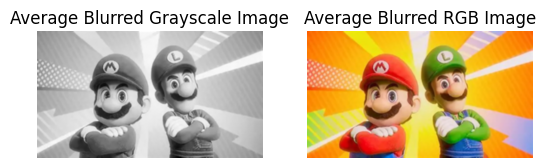

In [182]:
#Task 2 - Average Blur
def RGB_to_Grayscale(img):
  return (np.dot(img[...,:3],[0.299,0.587,0.114]))

def average_blur_gray(img,ksize):
  kernel = np.ones((ksize,ksize))/(ksize*ksize)
  img_conv = convolve(img, kernel)
  return img_conv

def average_blur_rgb(img,ksize):
  kernel = np.ones((ksize,ksize))/(ksize*ksize)
  C = img.shape[2]
  img_conv = np.zeros(img.shape)
  for i in range(C):
    img_conv[:,:,i] = convolve(img[:,:,i],kernel)
  return (img_conv/255.0).astype(np.float32)

gray = RGB_to_Grayscale(image)
image1 = average_blur_gray(gray,3)
image2 = average_blur_rgb(image,3)

plt.subplot(1,2,1)
plt.imshow(image1,cmap = "gray")
plt.title("Average Blurred Grayscale Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(image2)
plt.title("Average Blurred RGB Image")
plt.axis("off")


(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

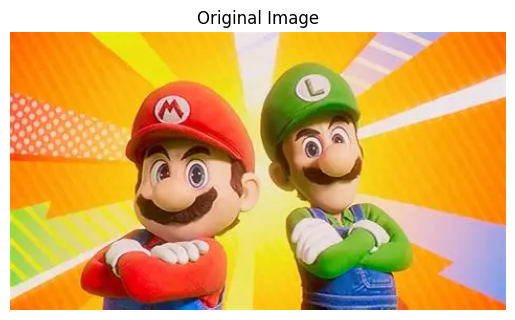

In [183]:
#Task 3 - Gaussian Blur
import math
def gaussian_kernel(ksize,sigma):
  kernel = np.zeros((ksize,ksize))
  for i in range(ksize):
    for j in range(ksize):
      kernel[i,j] = (np.exp(-((i**2 + j**2)/2*sigma**2)))/(2*(math.pi)*sigma**2)
  return kernel/np.sum(kernel)

def gaussian_blur_gray(img,ksize,sigma):
  kernel = gaussian_kernel(ksize,sigma)
  img_conv = convolve(img, kernel)
  return img_conv

def gaussian_rgb_blur(img,ksize,sigma):
  kernel = gaussian_kernel(ksize,sigma)
  C = img.shape[2]
  img_conv = np.zeros(img.shape)
  for i in range(C):
    img_conv[:,:,i] = convolve(img[:,:,i]*kernel)
  return (img_conv/255.0).astype(np.float32)


gray = RGB_to_Grayscale(image)
image1 = average_blur_gray(gray,3)
image2 = average_blur_rgb(image,3)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

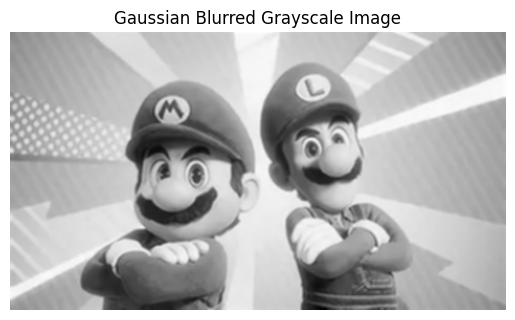

In [184]:
plt.imshow(image1,cmap = "gray")
plt.title("Gaussian Blurred Grayscale Image")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

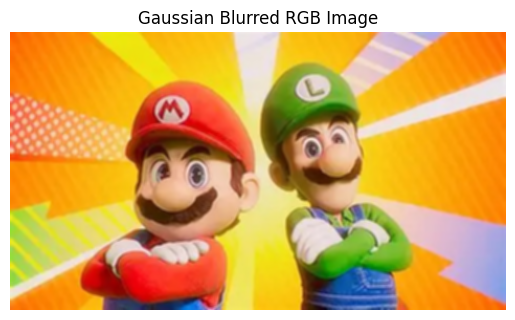

In [185]:
plt.imshow(image2)
plt.title("Gaussian Blurred RGB Image")
plt.axis("off")

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [186]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

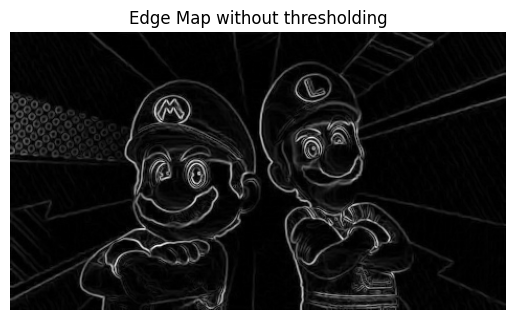

In [187]:
#Gx, Gy, G via Sobel

sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobel_y = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

G_x = convolve(gray,sobel_x)
G_y = convolve(gray,sobel_y)

G = np.sqrt(G_x**2 + G_y**2)

if np.max(G) > 255:
  G_norm = (G/np.max(G))*255  #normalisation
else:
  G_norm = G

G_norm1 = G_norm.astype(np.uint8)

plt.imshow(G_norm1,cmap = "gray")
plt.title("Edge Map without thresholding")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

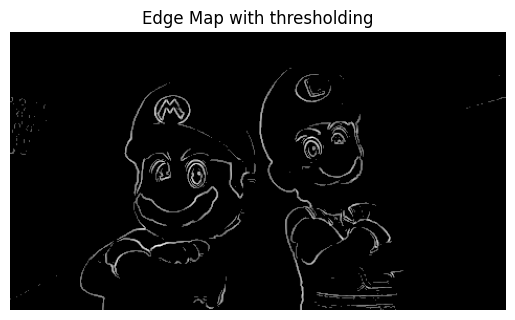

In [188]:
threshold = 80

Mask = G_norm < threshold
G_norm2 = G_norm.astype(np.uint8)
G_norm2[Mask] = 0

plt.imshow(G_norm2,cmap="gray")
plt.title("Edge Map with thresholding")
plt.axis("off")

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [189]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

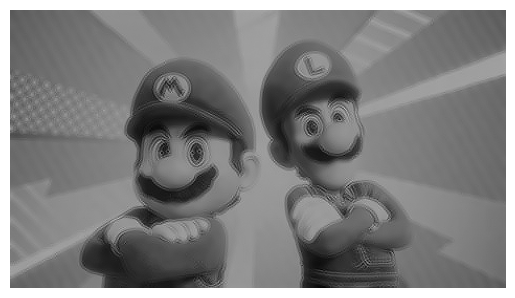

In [190]:
#Task 1 - Laplacian Sharpening

laplacian_kernel = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
]) #4-connected

lap = convolve(gray,laplacian_kernel)
alpha = 0.8
sharp = gray - lap*alpha
sharp[sharp<0] = 0

plt.imshow(sharp,cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

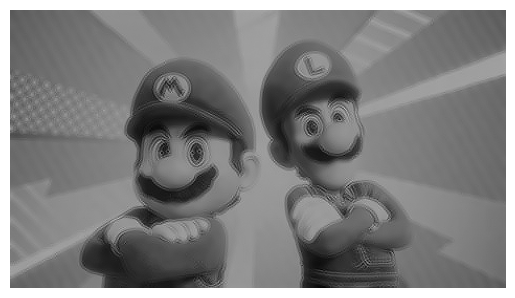

In [191]:
alpha = 1
plt.imshow(sharp,cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

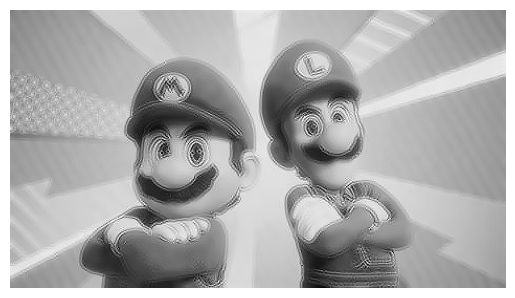

In [192]:
lap_cv = cv2.Laplacian((gray).astype(np.float32),cv2.CV_32F)
sharp_cv = np.clip(gray + alpha*lap_cv,0,255)
sharp_cv = sharp_cv.astype(np.uint8)
plt.imshow(sharp_cv,cmap="gray")
plt.axis("off")

[[ 0.0142  0.314   0.8184 ... -0.9394  1.25    0.7372]
 [ 0.1966  0.672   1.0456 ... -0.8738  1.7516  0.0564]
 [ 0.3662  0.9934  0.3064 ... -0.611   1.0476  0.874 ]
 ...
 [-0.238  -1.065  -0.6626 ...  1.0294  0.6488 -0.1956]
 [-0.2248  0.5456  1.2272 ... -1.0344 -0.374   1.8868]
 [ 0.38   -0.0152  0.284  ...  0.8     1.1148  1.8492]]


'Clearly, on comparing the matrices, we find that the final output is not identical'

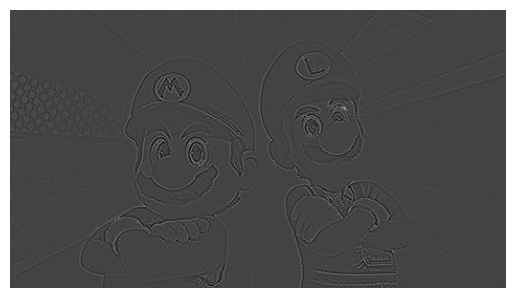

In [193]:
difference = sharp - sharp_cv
difference_2 = sharp_cv - sharp
print(difference)
plt.imshow(difference,cmap="gray")
plt.axis("off")

'''Clearly, on comparing the matrices, we find that the final output is not identical'''

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

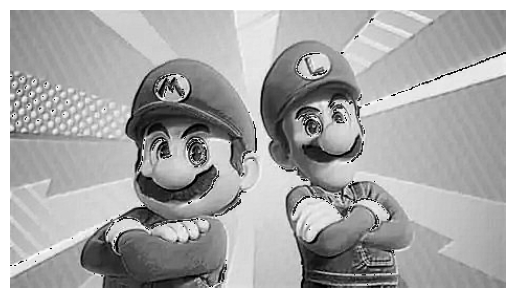

In [194]:
#Task 2 - Unsharp Masking

mask = gray - gaussian_blur_gray(gray,5,1)
sharp1 = gray + alpha*mask
sharp1[sharp1<0] = 0

alpha = 0.5
sharp1 = sharp1.astype(np.uint8)
plt.imshow(sharp1,cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(473.5), np.float64(265.5), np.float64(-0.5))

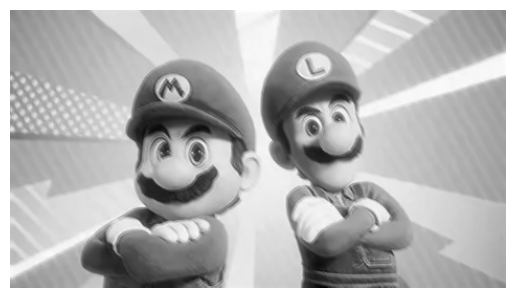

In [195]:
alpha = -0.5 #negative value of alpha
sharp2 = gray + alpha*mask
sharp2[sharp2<0] = 0
sharp2 = sharp2.astype(np.uint8)
plt.imshow(sharp2,cmap="gray")
plt.axis("off")

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [196]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

'Most images in media and in nature have slow-varying intensities and large smooth regions. This results in the magnitude spectrum\nto have a bright centre and dark cornering regions on average.'

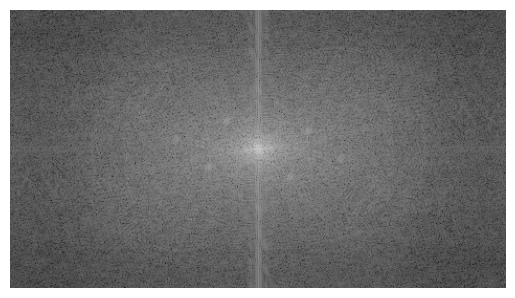

In [197]:
#Magnitude Spectrum of Original Image

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log1p(np.abs(fshift))

plt.imshow(magnitude_spectrum,cmap="gray")
plt.axis("off")

'''In magnitude spectrum, we know that the central areas correspond to lower frequencies whereas
the corner areas bind to higher frequencies. In addition, a bright pixel represents strong contribution of the associated frequency
and similarly, dark areas correspond to weaker contribution.'''

'''Most images in media and in nature have slow-varying intensities and large smooth regions. This results in the magnitude spectrum
to have a bright centre and dark cornering regions on average.'''

'As a result, the Gaussian blur kernel is a Low Pass Filter.'

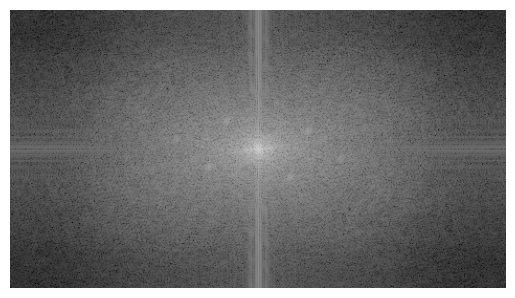

In [198]:
#Magnitude Spectrum of Gaussian Blurred Image

f2 = np.fft.fft2(gaussian_blur_gray(gray,5,1))
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log1p(np.abs(fshift2))

plt.imshow(magnitude_spectrum2,cmap="gray")
plt.axis("off")

'''As we can see, the corners of the magnitude spectrum seem a lot darker when applied to a Gaussian blurred image.
This happens because the Gaussian kernel majorly smoothens the picture. What this results in is an increase in the contribution of energy
from lower frequency, slower varying intensities, hence attenuating the contribution of higher frequencies.'''

'''As a result, the Gaussian blur kernel is a Low Pass Filter.'''

'Here, the opposite effect occurs. Notice that the corners appear a lot lighter (brighter) as compared to the base image.\nThis happens because the unsharp masking kernel is a High Pass Filter.\n\nAnd why? Because it takes the form I_final = I + alpha*(I - Blur(I))\n(I - Blur(I)) corresponds to the higher frequency components of the image. As we tweak alpha, we can control its contribution.\n\nMore specifically, as alpha increases, we "add" greater higher frequency energy contribution\nwhich essentially highlights high frequency areas a lot more, behaving like an HPF.'

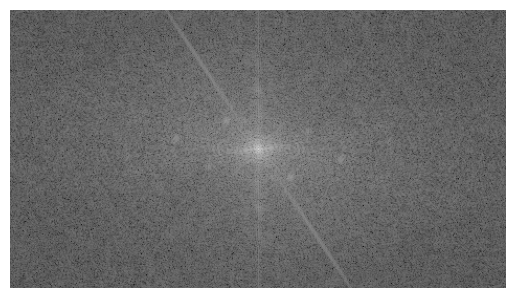

In [199]:
#Magnitude Spectrum of Unsharp Masking Image

f3 = np.fft.fft2(sharp1)
fshift3 = np.fft.fftshift(f3)
magnitude_spectrum3 = 20*np.log1p(np.abs(fshift3))

plt.imshow(magnitude_spectrum3,cmap="gray")
plt.axis("off")

'''Here, the opposite effect occurs. Notice that the corners appear a lot lighter (brighter) as compared to the base image.
This happens because the unsharp masking kernel is a High Pass Filter.

And why? Because it takes the form I_final = I + alpha*(I - Blur(I))
(I - Blur(I)) corresponds to the higher frequency components of the image. As we tweak alpha, we can control its contribution.

More specifically, as alpha increases, we "add" greater higher frequency energy contribution
which essentially highlights high frequency areas a lot more, behaving like an HPF.'''

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

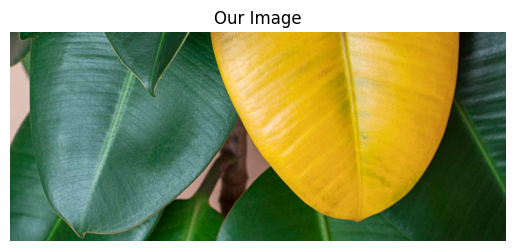

In [200]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [201]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

Text(0.5, 1.0, 'Yellow Response')

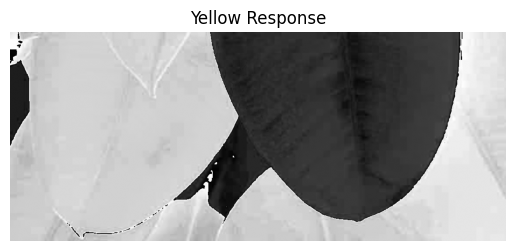

In [202]:
# 1. Yellow => (R high, G high, B low)
# Green => (R low, G high, B low)

R = img_part5[:,:,0] # This is our R matrix
G = img_part5[:,:,1] # This is our G matrix
B = img_part5[:,:,2]

yellow_response = R - G # This is our difference or R - G matrix
yellow_response[yellow_response<0]=0

plt.imshow(yellow_response,cmap = "gray")
plt.axis("off")
plt.title("Yellow Response")

Text(0.5, 1.0, 'Edge Map for R channel')

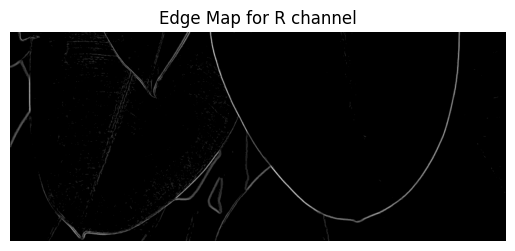

In [203]:
K_x = np.array([
    [-1,0,1],
    [-3,0,3],
    [-1,0,1]])

K_y = np.array([
    [-1,-3,-1],
    [0,0,0],
    [1,3,1]
])

G_x = convolve(R,K_x)
G_y = convolve(R,K_y)

G1 = np.sqrt(G_x**2 + G_y**2)
Threshold = 30
G1 = (G1/G1.max())*255
G1[G1 < Threshold] = 0
plt.imshow(G1.astype(np.uint8),cmap = "gray")
plt.axis("off")
plt.title("Edge Map for R channel")

Text(0.5, 1.0, 'Edge Map for G channel')

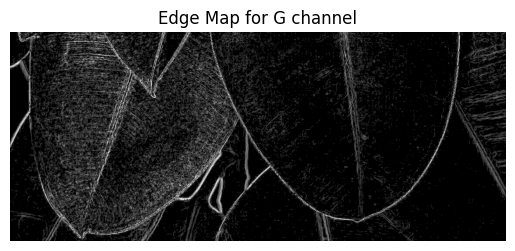

In [204]:
G_x2 = convolve(G,K_x)
G_y2 = convolve(G,K_y)

G2 = np.sqrt(G_x2**2 + G_y2**2)
G2[G2<Threshold]=0

# kinda useless, similar G channel values

plt.imshow(G2.astype(np.uint8),cmap = "gray")
plt.axis("off")
plt.title("Edge Map for G channel")

Text(0.5, 1.0, 'Edge Map for Yellow Response')

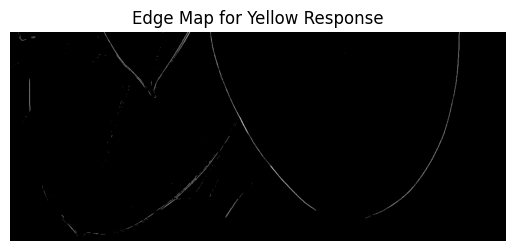

In [205]:
G3 = np.abs(G1-G2)
#This is finally where we can do some work.
#The yellow response or the yellow emphasis image is important because on applying our custom kernel, we see that green-green edges diminish
G3 = (G3/G3.max())*255
G3[G3 < 80] = 0
plt.imshow(G3.astype(np.uint8),cmap="gray")
plt.axis("off")
plt.title("Edge Map for Yellow Response")

Text(0.5, 1.0, 'Final Edge Map')

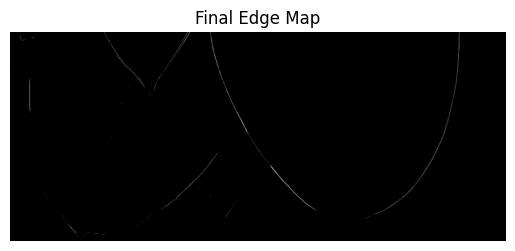

In [206]:
G_final = G1*G3
G_final = (G_final/G_final.max())*255
G_final[G_final < 20] = 0
plt.imshow(G_final.astype(np.uint8),cmap="gray")
plt.axis("off")
plt.title("Final Edge Map")

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
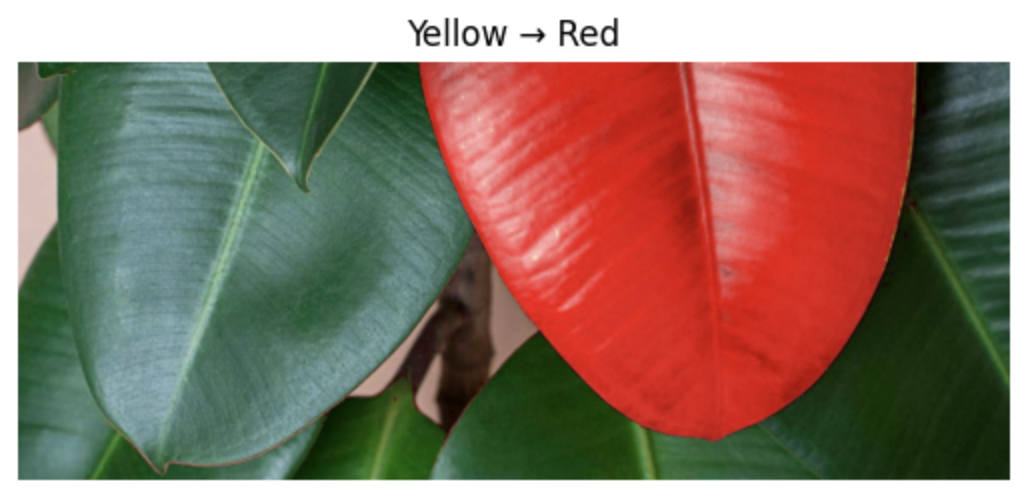

Also, we can change to a less brighter colour
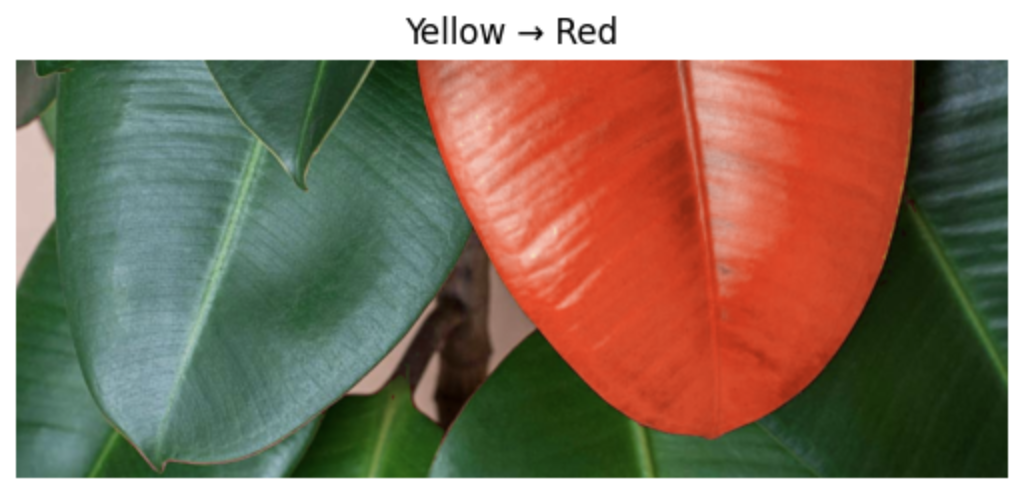

In [207]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.